<a id="1"></a> 
# <p style="padding:15px;background-color:#798517;margin:0;color:#F2ECC6;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">5. Model Building</p> 

<div style="border-radius:15px;border:#B71C1B solid;background-color:#F2ECC6; padding:20px; font-size:15px">

**✍️Data scaling** is necessary when the range of values differs across columns. By scaling the data, we ensure that each column has the same range or standardization of values. Standardization is important because higher scales may result in greater variance or covariance values, which can lead to bias. Therefore, we will begin by standardizing the features.

<a id="1"></a>  
#### <p style="padding:15px;background-color:#F2ECC6;margin:0;color:#A6AD3C;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">🔴5.1. Feature Scaling</p>

In [35]:
# Assign the column names of the original DataFrame to the cols variable
cols = df.columns

# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to data and transform it
scaled_col = scaler.fit_transform(df)

# Create a DataFrame from the scaled features
scaled_col = pd.DataFrame(scaled_col, columns=[cols])

scaled_col.head()

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.732054         -0.249881 -0.424934        -0.356957   
1  0.786858          0.134049 -0.469584        -0.356957   
2  0.447041          0.517980 -0.107716         0.108843   
3  0.049015         -1.017743  0.231995         0.546123   
4 -0.358849          0.517980 -0.462095        -0.347317   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.349114    -0.466805           -0.806649   
1              -0.454607     2.605438           -1.221928   
2              -0.454607    -0.466805            1.269742   
3              -0.454607    -0.368678           -1.014290   
4              -0.454607    -0.466805           -1.014290   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.678716                        -0.707409   
1                  -0.678716                        -0.917090   
2                   2.673295                        -0.917090   
3                  -0.399383                        -0.917090   
4                  -0.399383                        -0.917090   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.675294        -0.476083     -0.511381    -0.960380   
1               0.573949         0.110032     -0.591841     0.688601   
2              -0.675294        -0.476083     -0.109082     0.826016   
3              -0.258882        -0.329554     -0.551611     0.826016   
4              -0.675294        -0.476083     -0.551611    -0.905414   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.529026        -0.302427        -0.525588  0.360541  
1  0.818546         0.097453         0.234159  0.360541  
2 -0.383857        -0.093330        -0.525588  0.360541  
3 -0.598733        -0.228291        -0.525588  0.360541  
4 -0.364421        -0.257295        -0.525588  0.360541

<center> <span style="font-family:newtimeroman"> <span style="padding:300px;display:fill;border-radius:250px 250px;background-color:#D72A2B;font-size:200%;font-weight: 600;color:#F2ECC6;overflow:hidden;"> 5.2. K-means Clusteringㅤ</span>

<div style="border-radius:15px;border:#B71C1B solid;background-color:#F2ECC6; padding:20px; font-size:15px">

### ✍️K-means Clustering

**K-means** is a popular clustering algorithm used in unsupervised machine learning to group a set of data points into K number of clusters based on their similarity. It is a simple and efficient algorithm that can be applied to a wide range of datasets. The algorithm works by first selecting K random data points as the initial centroids of the clusters. It then assigns each data point to its closest centroid based on the Euclidean distance between them. Once all the data points have been assigned to a centroid, the algorithm computes the new centroids as the mean of all the data points in each cluster. This process is repeated until the centroids no longer change or the maximum number of iterations is reached.<blockquote>

- **K-means** is an iterative algorithm that tries to optimize the sum of squared distances between each data point and its assigned centroid. It does this by iteratively updating the centroids to minimize the sum of squared distances within each cluster. K-means is particularly useful when the dataset has a large number of dimensions or when it is difficult to visualize the data. However, the algorithm can be sensitive to the initial choice of centroids, and it may converge to a local minimum instead of the global minimum.
---
- **K-means** is widely used in various applications such as customer segmentation, image segmentation, anomaly detection, and data compression. It is also often used as a baseline method for comparing more advanced clustering algorithms. In addition, K-means is a powerful and flexible algorithm that can be used to identify hidden patterns and structures in large datasets.
            
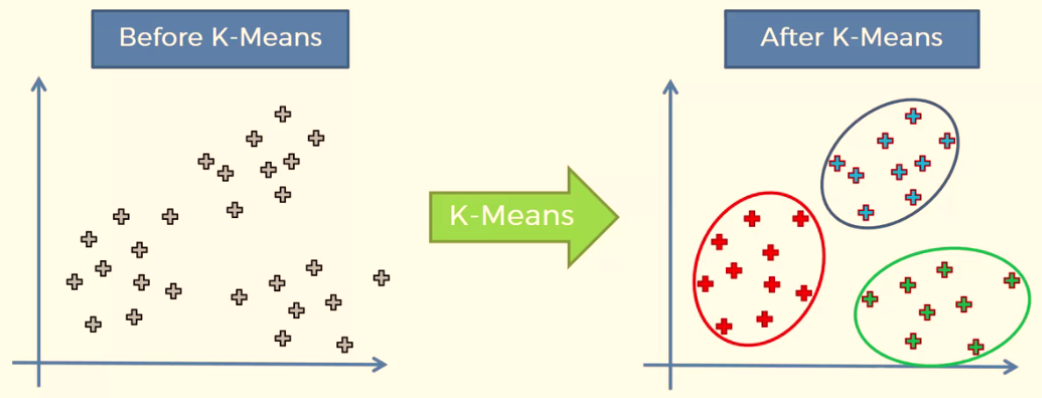

#### 🌴Building the Clustering Model with K-means

In [36]:
# Set the parameters for the KMeans algorithm
kmeans_params = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 1,
                 "tol": 1e-4, "algorithm": "auto", "verbose": 0}

#### 🌴Finding Optimal Number of Clusters with Elbow Method

<div style="border-radius:15px;border:#B71C1B solid;background-color:#F2ECC6; padding:20px; font-size:15px">
    
### ✍️Elbow Method

The **elbow method** is a technique used to determine the ideal number of clusters in K-means clustering. This method involves plotting the cost function's value produced by various values of K. The diagram below illustrates how the elbow method operates.
  
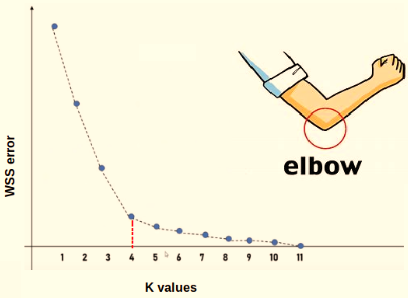
    
As we can observe from the plot, the average distortion reduces as K increases. This indicates that each cluster will have a smaller number of constituent instances, and these instances will be closer to their respective centroids. However, as K increases, the improvement in average distortion decreases. The point at which the improvement in distortion declines the most is known as the elbow point. This is the optimal number of clusters at which we should stop dividing the data into further clusters.

#### 🌴In the first way:

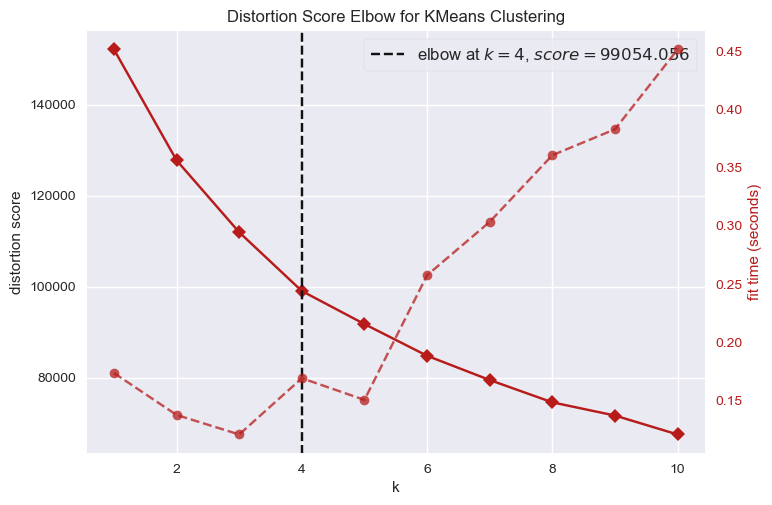

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Initialize KMeans model with the given parameters
k = (1, 11)
kmeans_model = KMeans(n_clusters=k, **kmeans_params)

# Create elbow plot visualizer with range of k values and timings enabled
elbow_visualizer = KElbowVisualizer(kmeans_model, k=k, timings=True)

# Fit the data to the visualizer
elbow_visualizer.fit(scaled_col)

# Add a title to the elbow plot
elbow_visualizer.ax.set_title('Elbow Plot for KMeans Clustering')

# Finalize and render the figure
elbow_visualizer.show()

<div style="border-radius:15px;border:#A6AD3C solid;background-color:#F2ECC6; padding:20px; font-size:15px">

**🪐Explanations:**

Using the elbow method, we can observe that the optimal number of clusters is k=6.

#### 🌴In the second way:

In [38]:
# Perform KMeans clustering for different values of k and store the inertia values
inertia_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, **kmeans_params)
    kmeans.fit(scaled_col)
    inertia_values.append(kmeans.inertia_)

In [39]:
# pip install kneed or conda install kneed
!pip install kneed

Knee point found at 4 clusters


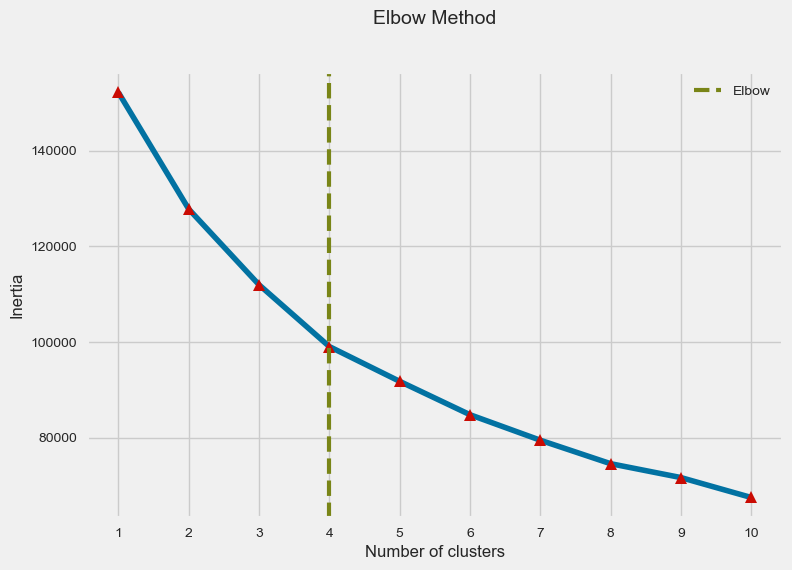

In [40]:
# Find the knee point in the curve
kl = KneeLocator(range(1, len(inertia_values)+1), inertia_values, curve='convex', direction='decreasing')
if kl.knee:
    knee_point = kl.knee
    print(f'Knee point found at {knee_point} clusters')
else:
    print('No knee point found')

# Plot the curve with the knee point highlighted
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots()
    ax.plot(range(1, len(inertia_values)+1), inertia_values, marker='^', c='b', ms=9, mfc='r')
    ax.axvline(x=knee_point, color="#798517", label='Elbow', ls='--', linewidth=3)
    ax.set_xticks(range(1, len(inertia_values)+1))
    ax.set_xlabel('Number of clusters', fontsize=12)
    ax.set_ylabel('Inertia', fontsize=12)
    plt.title('Elbow Method', y=1.09, fontsize=14)
    ax.legend()
    plt.show()

<div style="border-radius:15px;border:#A6AD3C solid;background-color:#F2ECC6; padding:20px; font-size:15px">

**🪐Explanations:**

Utilizing the **elbow method**, it has been determined that the **optimal number of clusters** for the k-means algorithm is **k=6**. In order to assess the validity of this result, we have employed various internal validation techniques. Specifically, we have utilized the **Silhouette score** and the **Calinski-Harabasz score** to evaluate the efficacy of our clustering approach.

### 🌴Model Evaluation

<div style="border-radius:15px;border:#B71C1B solid;background-color:#F2ECC6; padding:20px; font-size:15px">

**✍️Silhouette Coefficient**

**Silhouette coefficient** is a metric used to evaluate the quality of clustering in unsupervised learning. It measures how similar an object is to its own cluster compared to other clusters. The silhouette coefficient ranges from -1 to 1, with 1 indicating that the object is well-matched to its own cluster and poorly matched to neighboring clusters, while -1 indicates that the object is poorly matched to its own cluster and well-matched to neighboring clusters. A value close to 0 indicates that the object is close to the boundary between two clusters. A higher Silhouette coefficient score indicates that the clustering model has generated well-separated and distinct clusters, and the objects are correctly assigned to their respective clusters. Silhouette coefficient is widely used in clustering tasks because it is easy to calculate and interpret, and it works well with many different types of clustering algorithms.
    
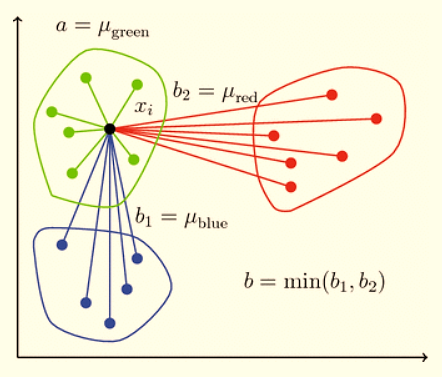    



**✍️Calinski-Harabasz Coefficient**

**Calinski-Harabasz coefficient** is another metric used to evaluate the quality of clustering in unsupervised learning. It measures the ratio of the between-cluster variance to the within-cluster variance. A higher Calinski-Harabasz coefficient indicates that the clusters are more separated and distinct from each other. This means that the clustering model has generated well-separated and distinct clusters, and the objects are correctly assigned to their respective clusters. The Calinski-Harabasz coefficient is particularly useful when comparing different clustering algorithms or when selecting the optimal number of clusters in the data. However, the main drawback of the Calinski-Harabasz coefficient is that it can be sensitive to outliers, so it is important to preprocess the data and remove any outliers before using this metric to evaluate clustering models.

#### 🌴Find the best 'k' for Silhouette and Calinski-Harabasz coefficient

In [41]:
# Calculate silhouette coefficient and calinski harabasz coefficient
silhouette_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_col)
    score = silhouette_score(scaled_col, kmeans.labels_)
    silhouette_coef.append(score)

calinski_harabasz_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_col)
    score = calinski_harabasz_score(scaled_col, kmeans.labels_)
    calinski_harabasz_coef.append(score)

In [42]:
# Create a dataframe to store the scores
scores_kmeans = pd.DataFrame({'k': range(2,11),
'Silhouette Score': silhouette_coef,
'Calinski-Harabasz Score': calinski_harabasz_coef})

# Find the best k for each score
best_k_silhouette = scores_kmeans.loc[scores_kmeans['Silhouette Score'].idxmax(), 'k']
best_k_calinski_harabaz = scores_kmeans.loc[scores_kmeans['Calinski-Harabasz Score'].idxmax(), 'k']

In [43]:
print("\nScores for Different Numbers of Clusters:")
scores_kmeans.style.background_gradient(cmap=cmap).set_properties(**{'font-family': 'Segoe UI'}).hide_index()


Scores for Different Numbers of Clusters:


In [44]:
def plot_evaluation(sh_score, ch_score, name, x=range(2,11)):
    """
    for draw evaluation plot include silhouette_score and calinski_harabasz_score.
        sh_score(list): include silhouette_score of models
        ch_score(list): include calinski_harabasz_score of models
        name(string): name of clustering algorithm
        x(list): has range of number for x axis
    """
    colors = ["#B71C1B","#D72A2B","#F2ECC6","#D5D68A","#A6AD3C","#798517"]
    fig, ax = plt.subplots(1,2, figsize=(15,7), dpi=100)
    ax[0].plot(x, sh_score, color=colors[1], marker='o', ms=7, mfc=colors[-1])
    ax[1].plot(x, ch_score, color=colors[1], marker='o', ms=7, mfc=colors[-1])
    ax[0].set_xlabel("Number of Clusters", labelpad=20)
    ax[0].set_ylabel("Silhouette Coefficient", labelpad=20)
    ax[1].set_xlabel("Number of Clusters", labelpad=20)
    ax[1].set_ylabel("calinski Harabasz Coefficient", labelpad=20)
    plt.suptitle(f'Evaluate {name} Clustering', y=0.9)
    plt.tight_layout(pad=3)
    plt.show()

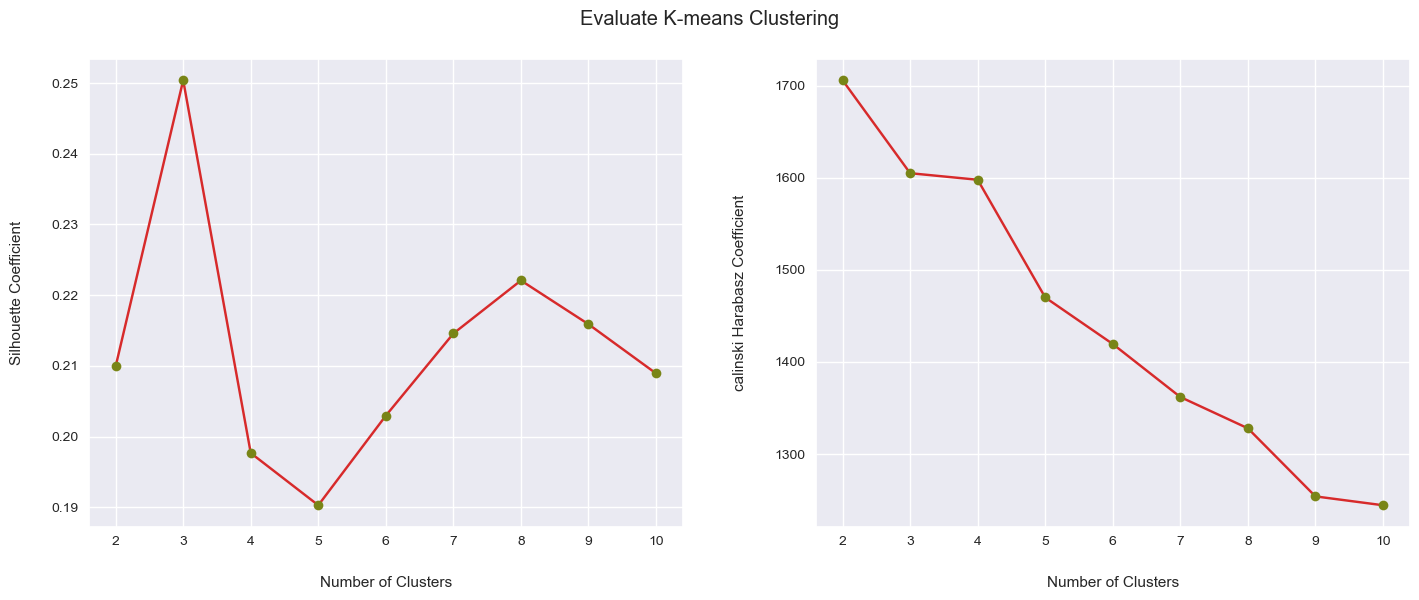

In [45]:
# Visualize plots of silhouette and calinski harabasz scores for kmeans models
plot_evaluation(silhouette_coef, calinski_harabasz_coef, 'K-means')

<div style="border-radius:15px;border:#B71C1B solid;background-color:#F2ECC6; padding:20px; font-size:15px">

**✍️Silhouette** and **Calinski-Harabasz** score are both used to evaluate the quality of clustering models. A higher Silhouette score and Calinski-Harabasz score indicate better clustering results.<blockquote>

- The **Silhouette score** measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a score closer to 1 indicates a better clustering result. A Silhouette score of 0 indicates overlapping clusters, and negative values indicate that the objects may be assigned to the wrong cluster.
---
- The **Calinski-Harabasz score**, also known as the Variance Ratio Criterion, measures the ratio of the between-cluster variance to the within-cluster variance. A higher Calinski-Harabasz score indicates that the clusters are more separated and distinct from each other.

✅Therefore, **a good Silhouette** and **Calinski-Harabasz score** implies that the clustering model has generated well-separated and distinct clusters, and the objects are correctly assigned to their respective clusters. However, the interpretation of what constitutes a good score can vary depending on the specific dataset and context of the clustering task. It is important to compare the scores of different models and choose the one that performs the best for the given dataset and task.

In [46]:
# Best k for each coef
print(f"\n▪️Best k for Silhouette Coefficient: {best_k_silhouette}")
print(f"▪️Best k for Calinski-Harabasz Coefficient: {best_k_calinski_harabaz}")


▪️Best k for Silhouette Coefficient: 3
▪️Best k for Calinski-Harabasz Coefficient: 2


<div style="border-radius:15px;border:#B71C1B solid;background-color:#F2ECC6; padding:20px; font-size:15px">

✍️When we have **multiple evaluation metrics** with different best values for k, it can be challenging to decide which one to use to choose the number of clusters for your clustering model.

- 1️⃣**One approach** could be to look at the characteristics of the clustering results for each k value suggested by the two metrics and compare them to the domain knowledge or business requirements. This can help to identify the k value that leads to the most meaningful or useful clusters.
-----
- 2️⃣**Another approach** could be to use a **hybrid metric** that combines multiple evaluation metrics into a single score. For instance, you could use the **geometric mean** of the Silhouette Score and the Calinski-Harabasz Score to rank the k values and choose the one with the highest hybrid score. This approach can help to balance the strengths and weaknesses of different evaluation metrics and reduce the risk of overfitting to a single metric.

#### 🌴Using Hybrid Score to Find the Best k

In [47]:
def select_k(scaled_col):
    silhouette_scores = []
    calinski_scores = []
    k_values = range(2, 11)

    for k in k_values:
        # Perform clustering using KMeans algorithm
        kmeans = KMeans(n_clusters=k, **kmeans_params)
        labels = kmeans.fit_predict(scaled_col)

        # Calculate Silhouette Score
        silhouette_scores.append(silhouette_score(scaled_col, labels))

        # Calculate Calinski-Harabasz Score
        calinski_scores.append(calinski_harabasz_score(scaled_col, labels))

    hybrid_scores = np.sqrt(np.multiply(silhouette_scores, calinski_scores))
    best_k = k_values[np.argmax(hybrid_scores)]
    return best_k

In [48]:
best_k = select_k(scaled_col)
print("\n✅Best value of k:", best_k)


✅Best value of k: 3


#### 🌴Implement K-means with the Best Number of Clusters

In [49]:
# Implement kmeans clustering with n_clusters=3
kmeans = KMeans(n_clusters=best_k, **kmeans_params).fit(scaled_col)

# Store result of kmeans
pred = kmeans.labels_

# Get the coordinates of the centroids of the three clusters
centroids = kmeans.cluster_centers_

# Convert the centroids array to a DataFrame and assign column names
centroids = pd.DataFrame(centroids, columns = scaled_col.columns)
centroids

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.367227         -0.179740 -0.234509        -0.206109   
1  0.303944          0.439589  1.511614         1.268264   
2  1.166323          0.342575 -0.289383        -0.207014   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.175729    -0.308897           -0.066657   
1               1.243736    -0.249556            1.141921   
2              -0.303986     1.377638           -0.641343   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.240889                        -0.049147   
1                   1.564646                         0.943199   
2                  -0.306603                        -0.552346   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.333864        -0.298505     -0.246261    -0.337131   
1              -0.361336        -0.252896      1.665562     0.877590   
2               1.560896         1.340504     -0.365267     0.600897   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.285178        -0.137907         0.003822 -0.028490  
1  0.823743         0.156766         0.503755  0.298415  
2  0.444407         0.404539        -0.410046 -0.125249

In [50]:
# Convert the centroids from scaled values to the original scale
real_centroids = scaler.inverse_transform(centroids)

# Convert the centroids array to a DataFrame and assign column names
real_centroids = pd.DataFrame(real_centroids, columns=df.columns)
real_centroids

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0   800.275491           0.834790   502.262838        250.387735   
1  2197.296209           0.981438  4233.043267       2697.663874   
2  3992.310601           0.958467   385.018966        248.886107   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              252.196794    331.157545             0.463653   
1             1535.858626    455.603491             0.948701   
2              136.210395   3868.069401             0.233011   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.130616                          0.344946   
1                    0.669259                          0.739333   
2                    0.111012                          0.144960   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.068327          1.211898       8.590134   3267.760339   
1                0.062830          1.523163      56.112620   7687.659744   
2                0.447509         12.397492       5.631975   6680.880593   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0   907.744449        523.296693          0.154850  11.479843  
1  4118.077849       1210.702251          0.301078  11.916933  
2  3019.898646       1788.701828          0.033796  11.350470

#### 🌴Evaluation of the performance of the K-means model

In [51]:
# Calculate scores
silhouette = silhouette_score(scaled_col, pred)
calinski = calinski_harabasz_score(scaled_col, pred)

# Create a DataFrame with the scores
km_scores = pd.DataFrame({'Silhouette Score': [silhouette], 'Calinski-Harabasz Score': [calinski]}, index=['K-means'])
km_scores

Silhouette Score  Calinski-Harabasz Score
K-means          0.250397              1604.882094

#### 🌴Addition of Cluster Column to the Data frame

In [52]:
kmeans_clustered_df = pd.concat([df, pd.DataFrame(pred, columns=['K-means Cluster'])], axis = 1)
kmeans_clustered_df.head(10).style.set_properties(**{'background-color': '#F2ECC6'}, subset=['K-means Cluster'])

In [53]:
kmeans_clustered_df.shape

(8949, 18)

#### 🌴Size of the Clusters

In [54]:
Kmeans_clust_sizes = kmeans_clustered_df.groupby('K-means Cluster').size().to_frame()
Kmeans_clust_sizes.columns = ["K-means Size"]
Kmeans_clust_sizes

K-means Size
K-means Cluster              
0                        6104
1                        1252
2                        1593

#### 🌴Distribution of Data Points by Cluster

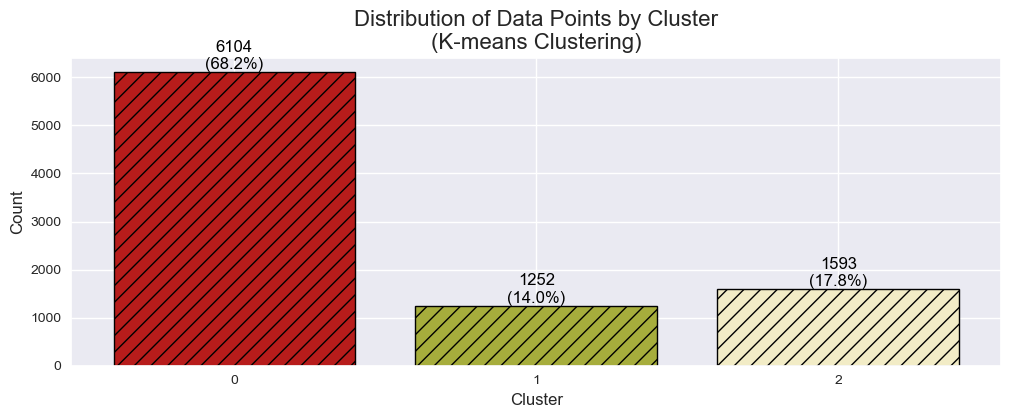

In [55]:
# Distribution of Data Points by Cluster
counts = kmeans_clustered_df['K-means Cluster'].value_counts()
labels = counts.index.tolist()
sizes = counts.tolist()

# Calculate percentages and counts
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]
counts = [f'{size}\n({percentages[i]:.1f}%)' for i, size in enumerate(sizes)]

# Create the bar plot
plt.figure(figsize=(12, 4))
colors = ["#B71C1B","#F2ECC6","#A6AD3C"]
bars = plt.bar(labels, sizes, color=colors, edgecolor='black', linewidth=1, hatch='//')
plt.xticks(range(len(labels)), [str(i) for i in range(len(labels))])

# Add counts to bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             counts[i], ha='center', va='bottom', color='black', fontsize=12)

# Set the axis labels and title
plt.xlabel('Cluster', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title('Distribution of Data Points by Cluster\n(K-means Clustering)', fontsize= 16)
plt.show()

#### 🌴Distribution of data in different clusters

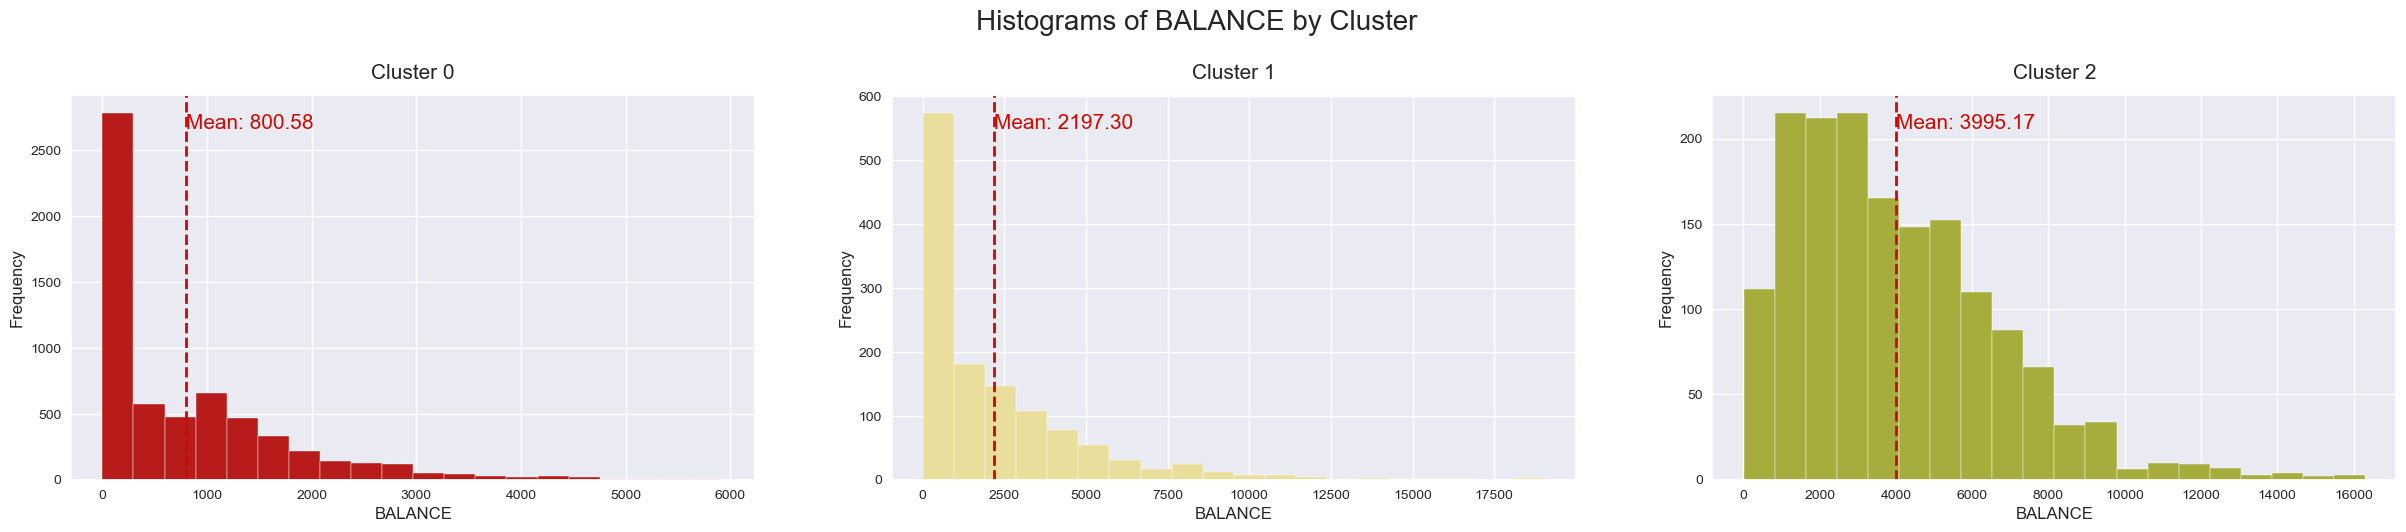

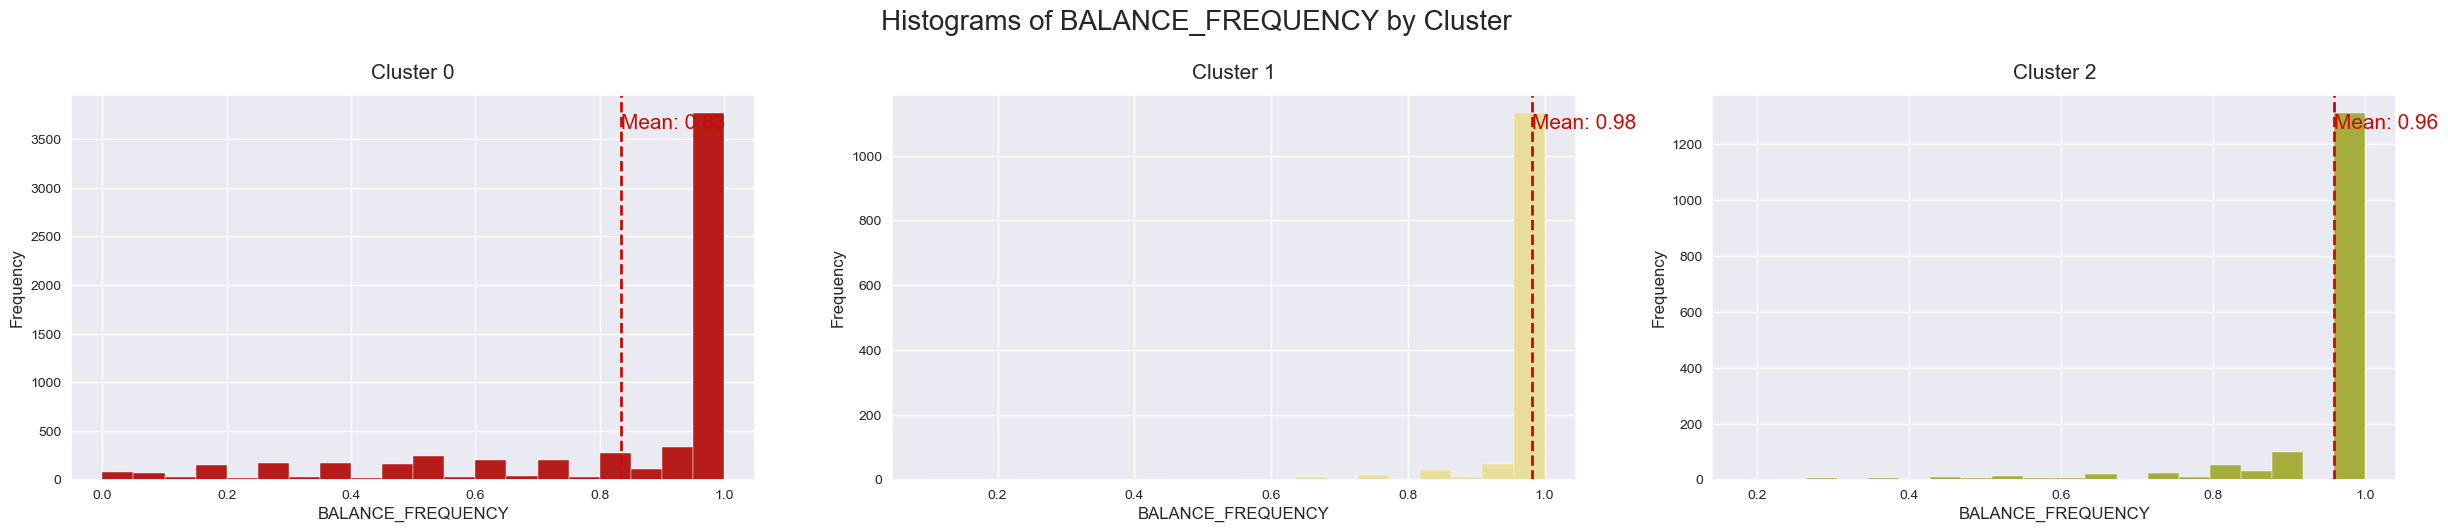

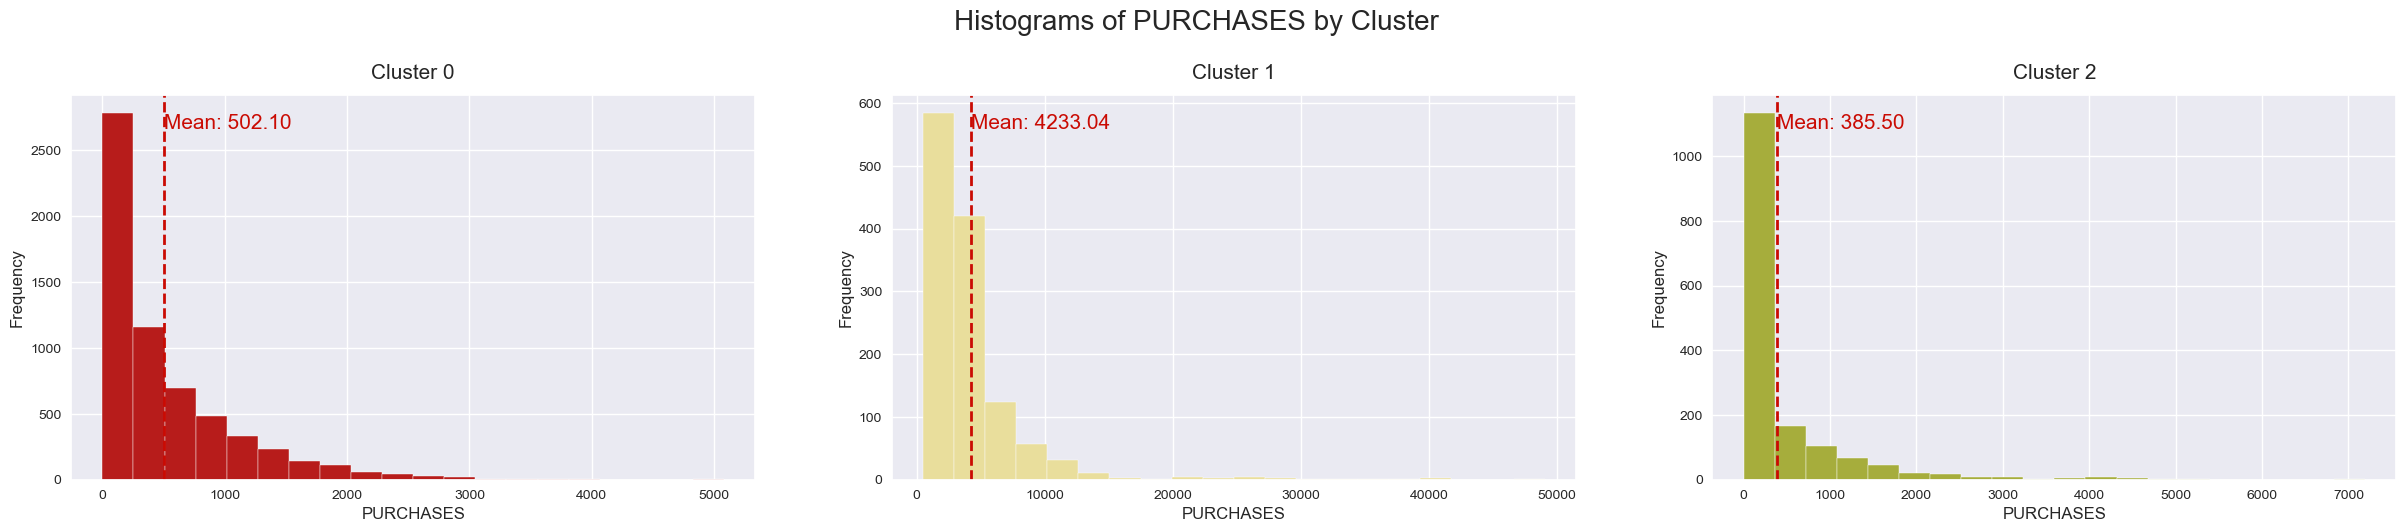

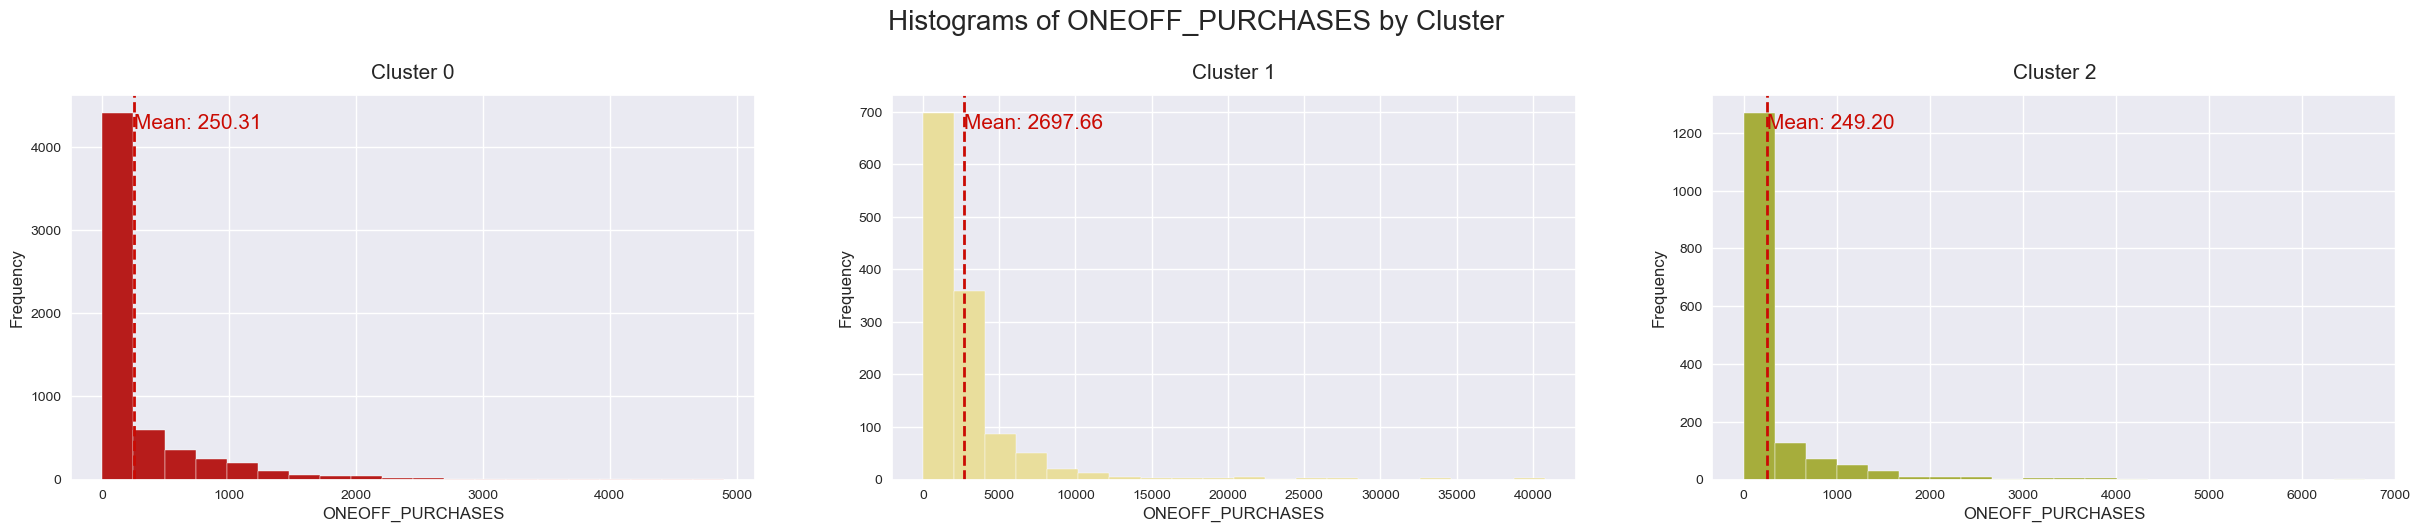

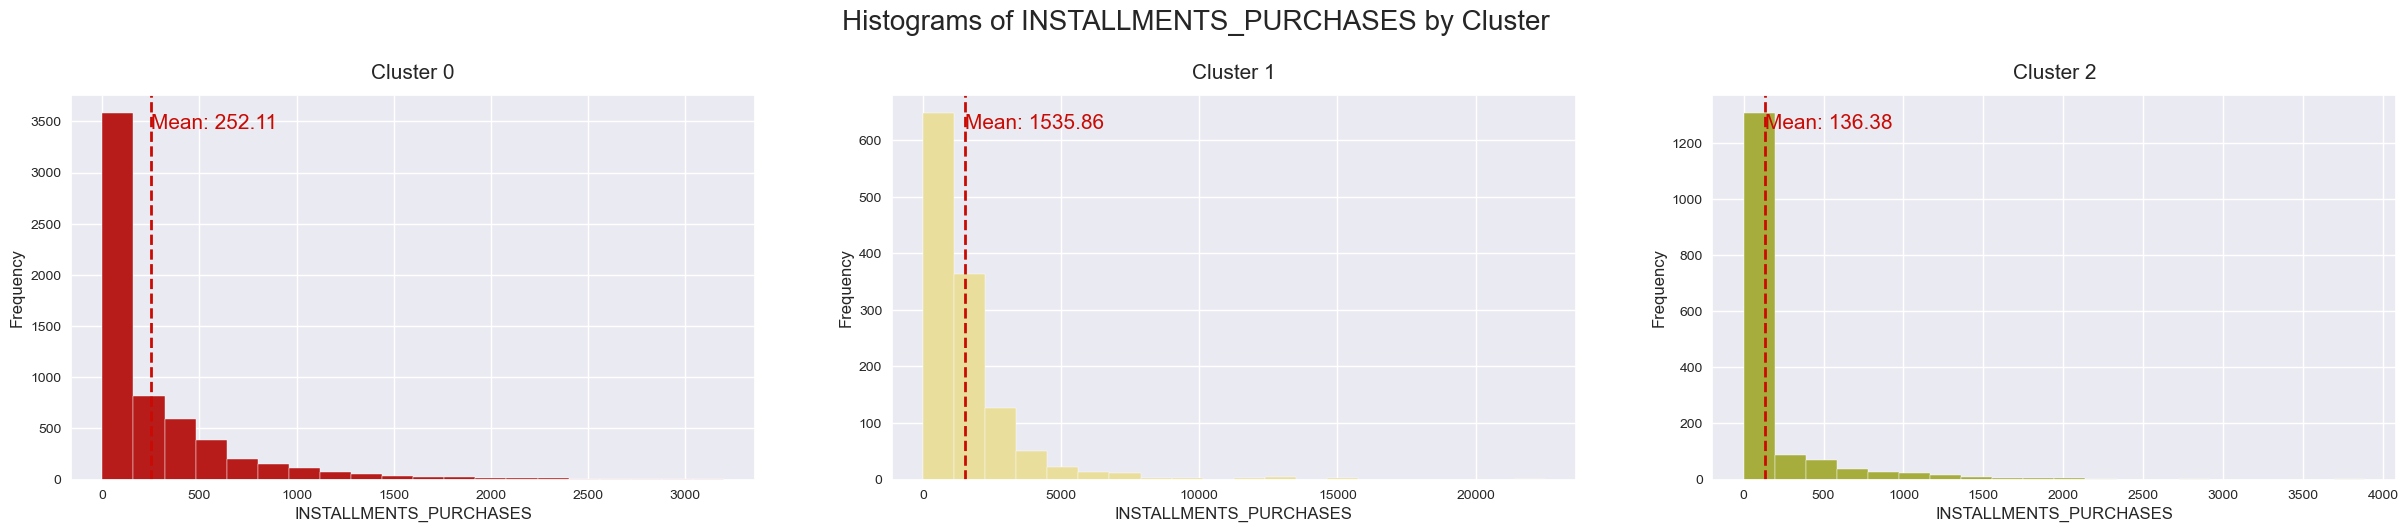

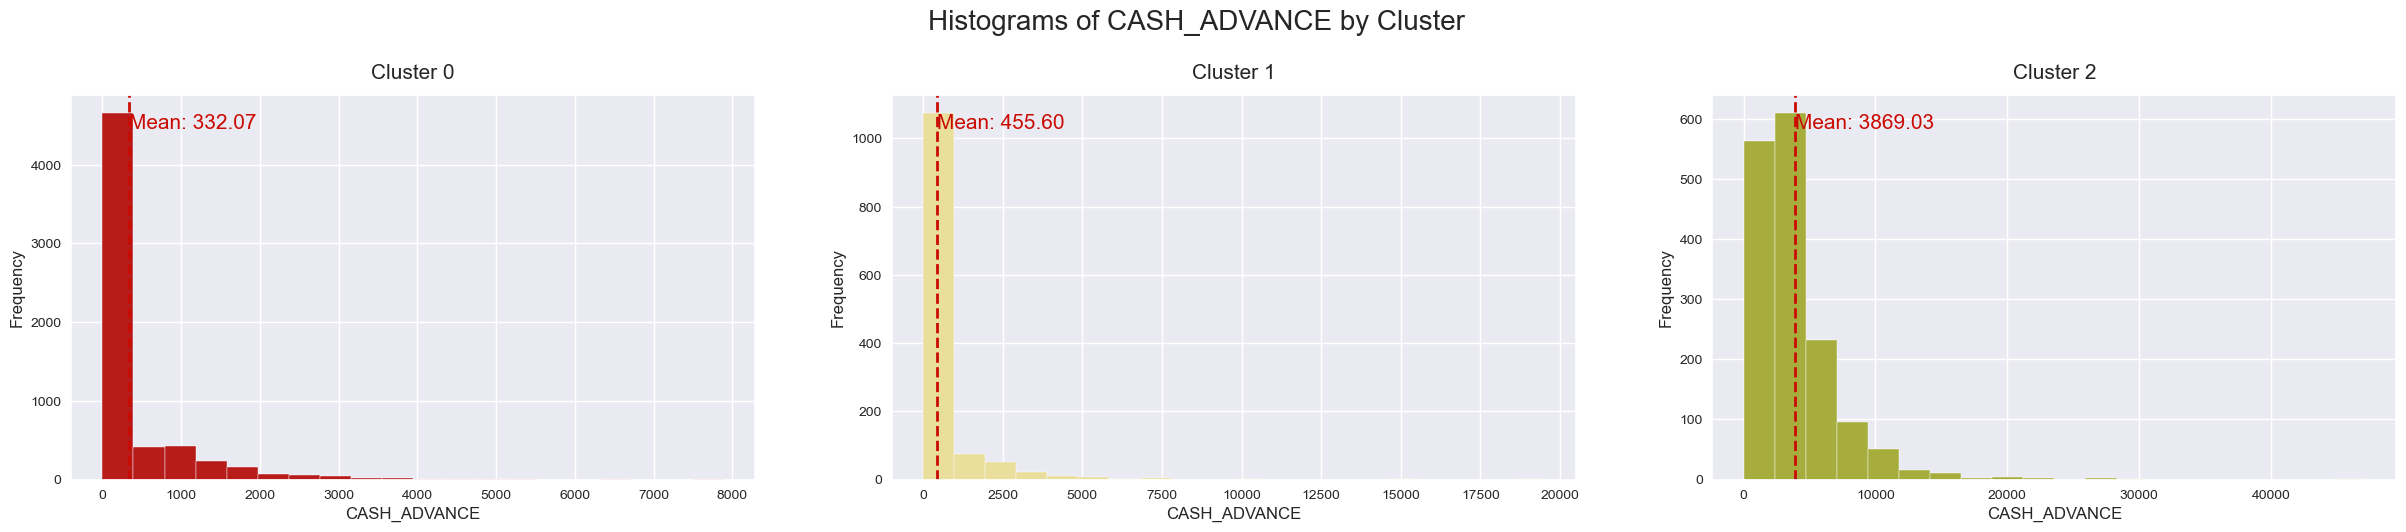

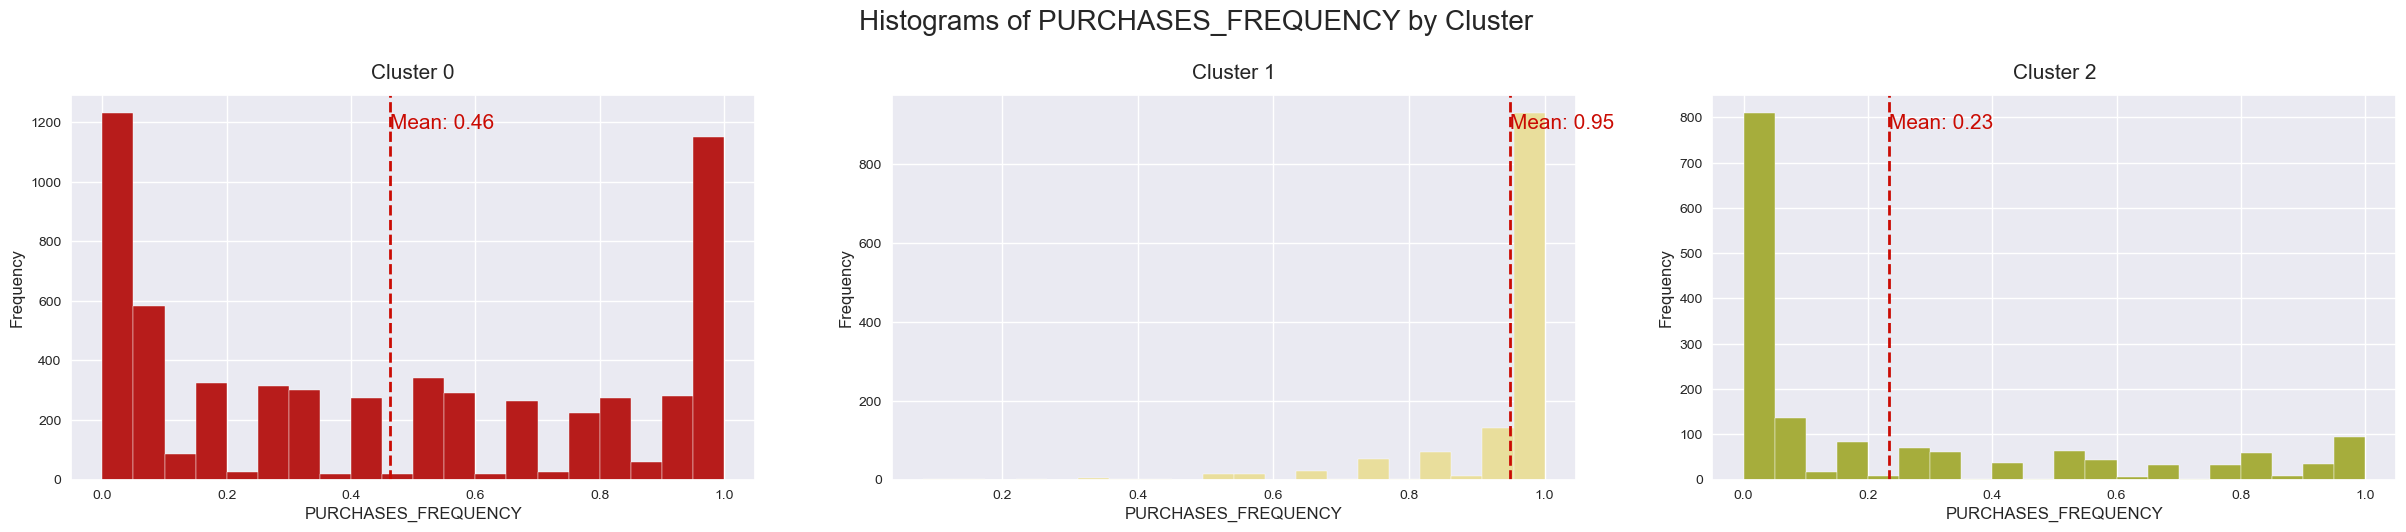

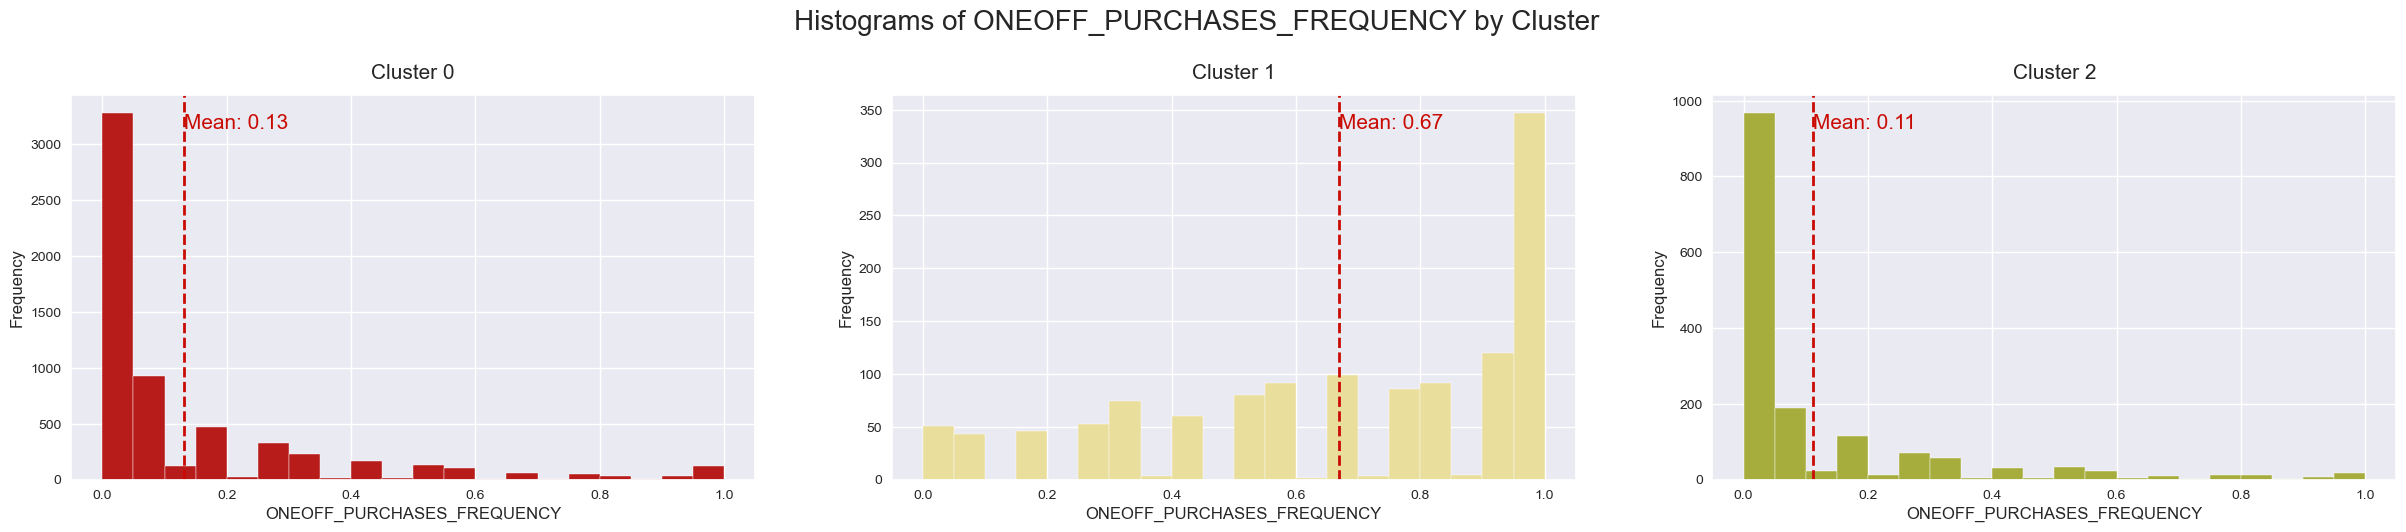

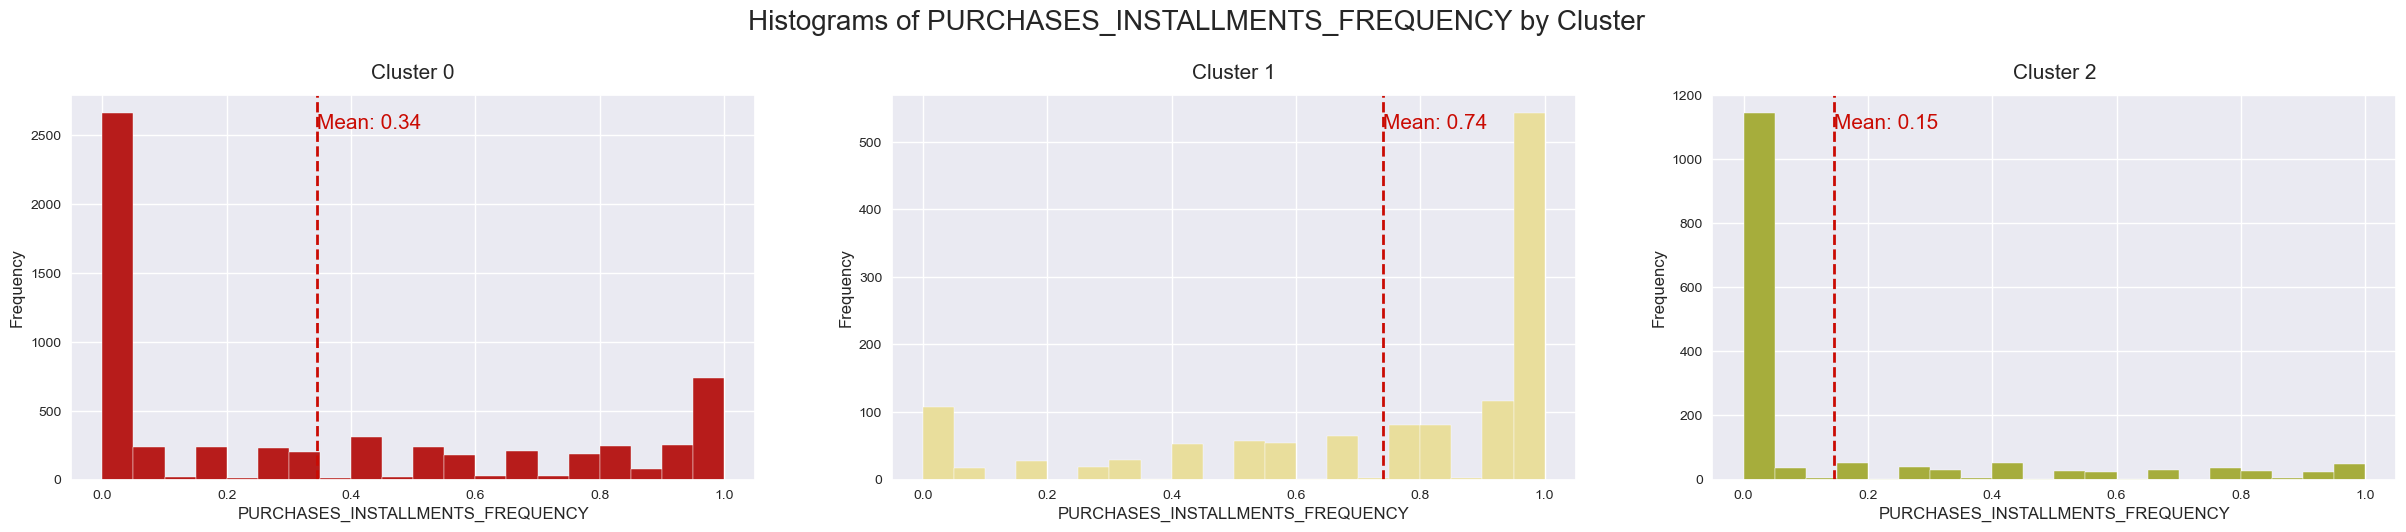

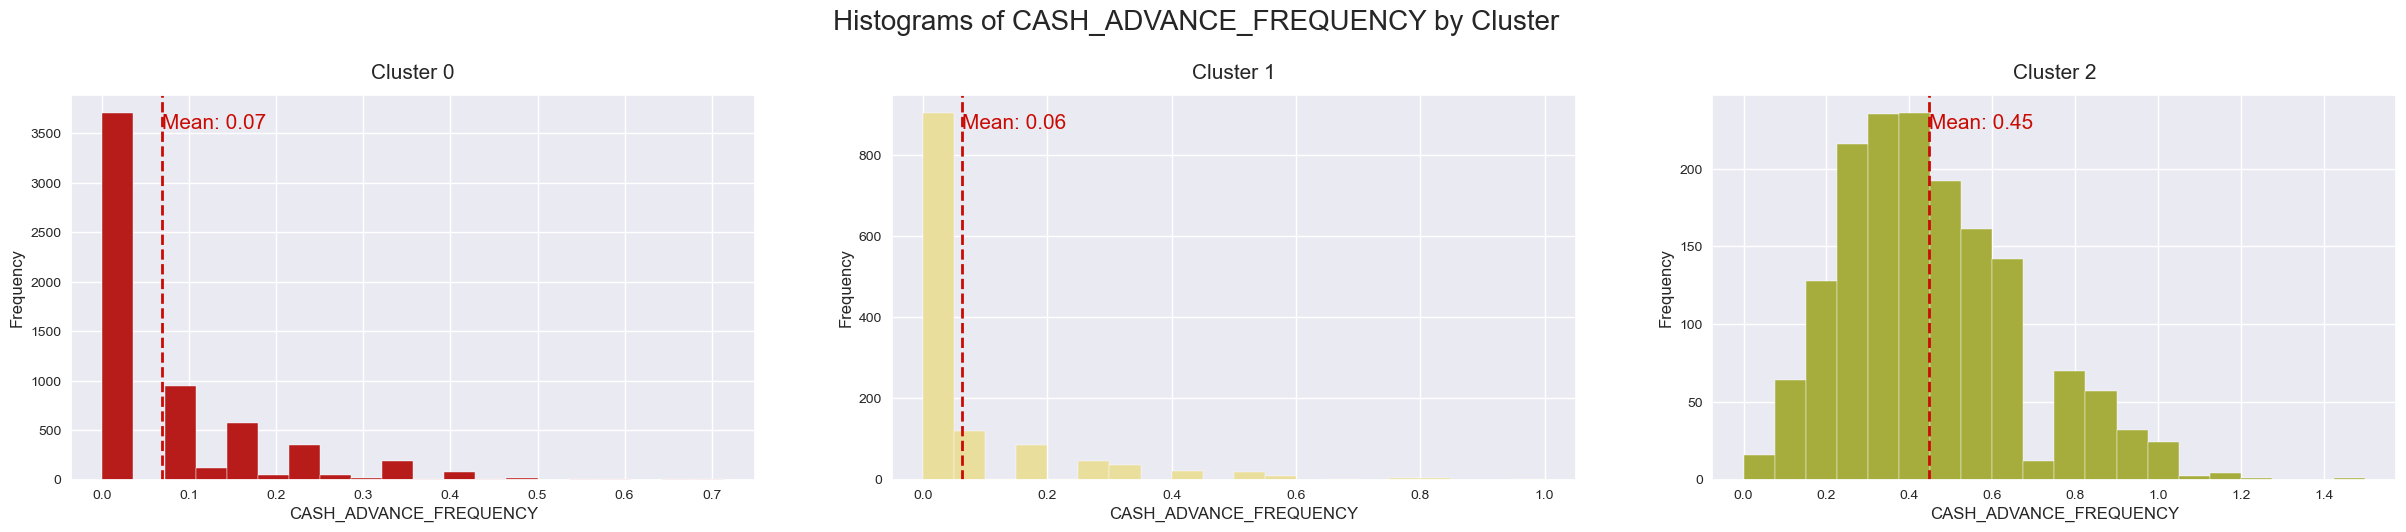

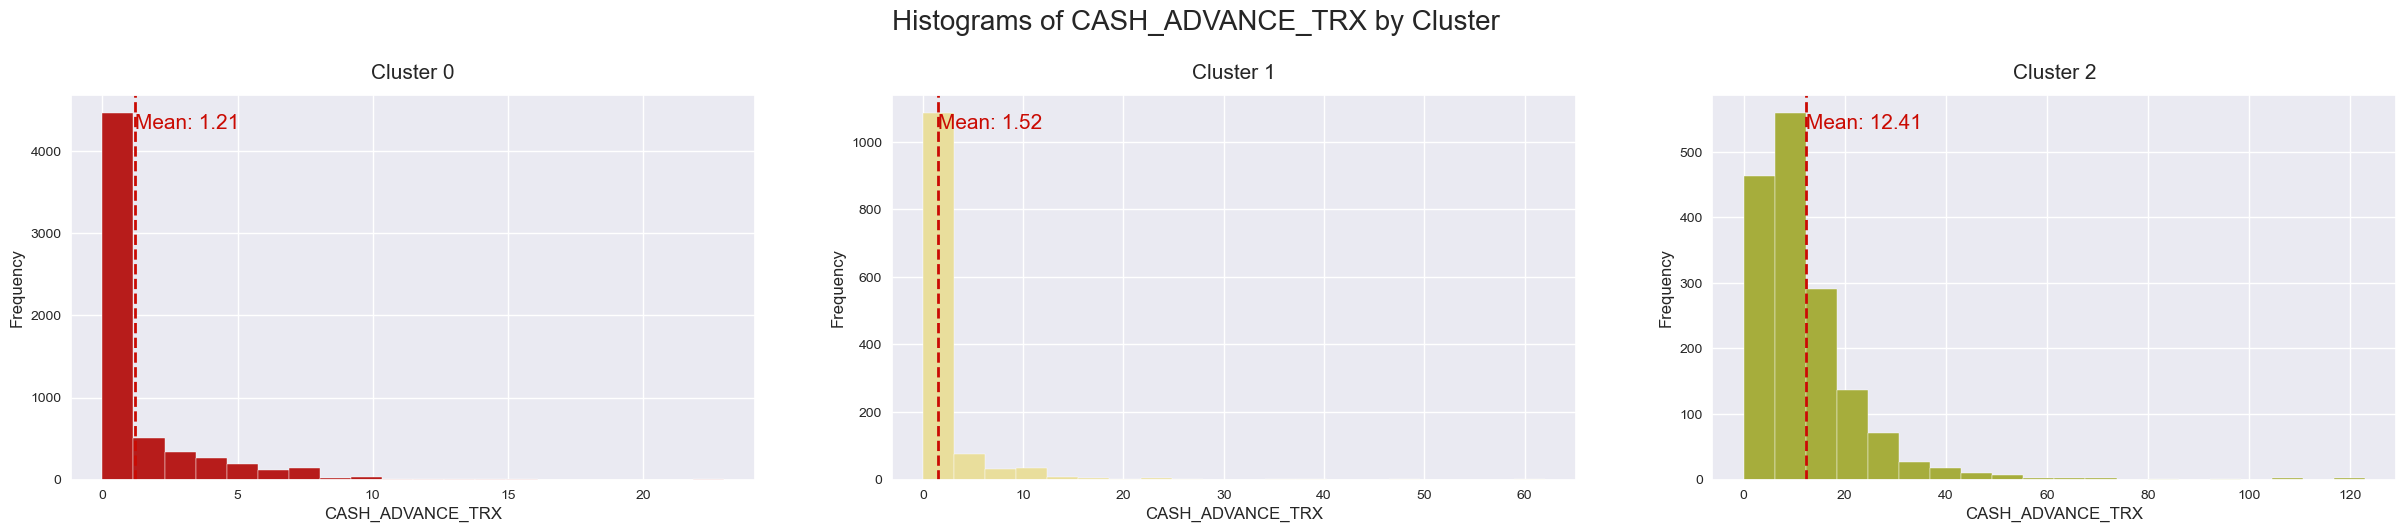

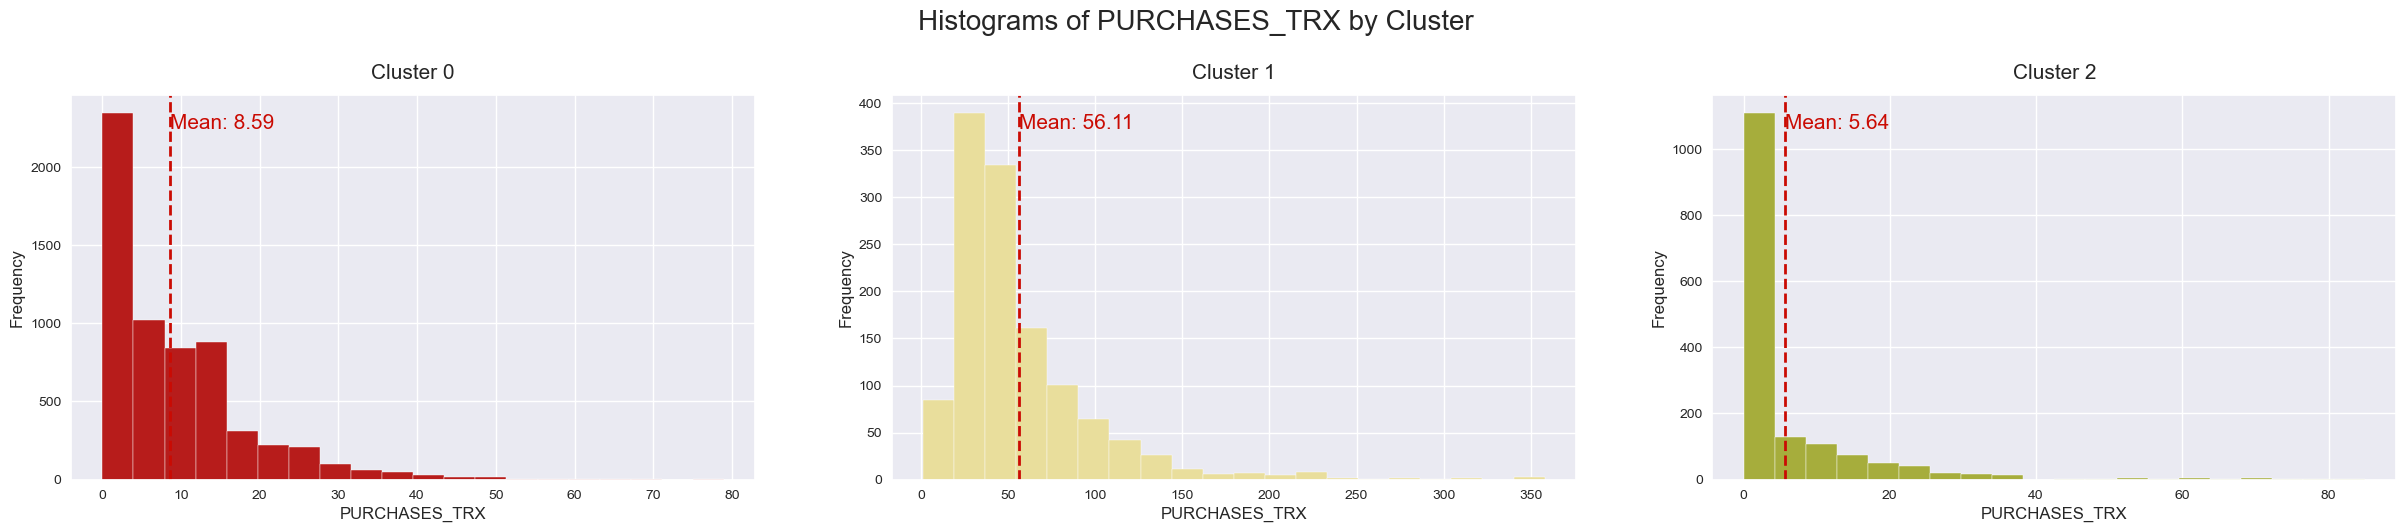

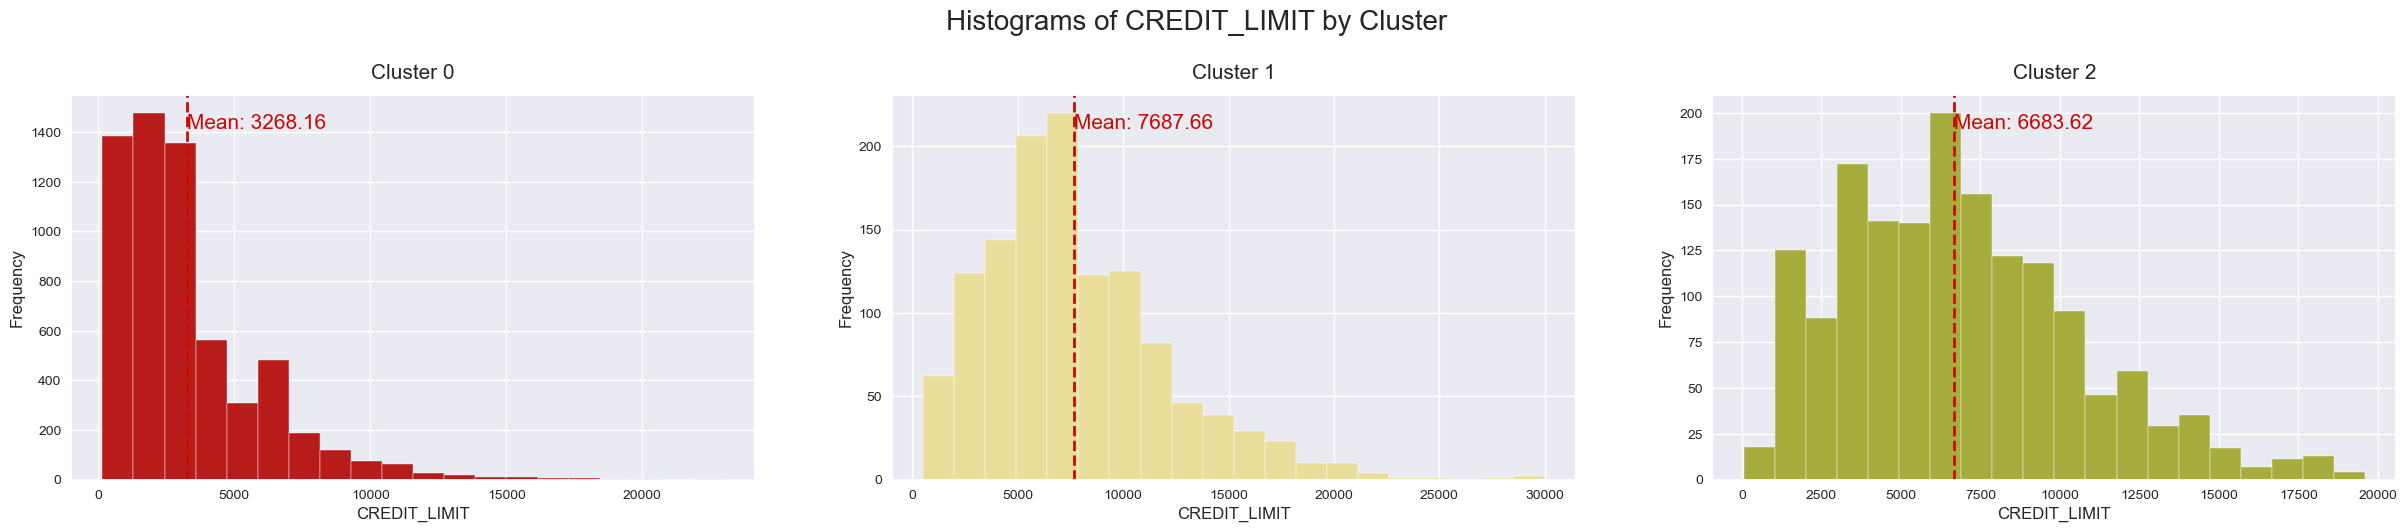

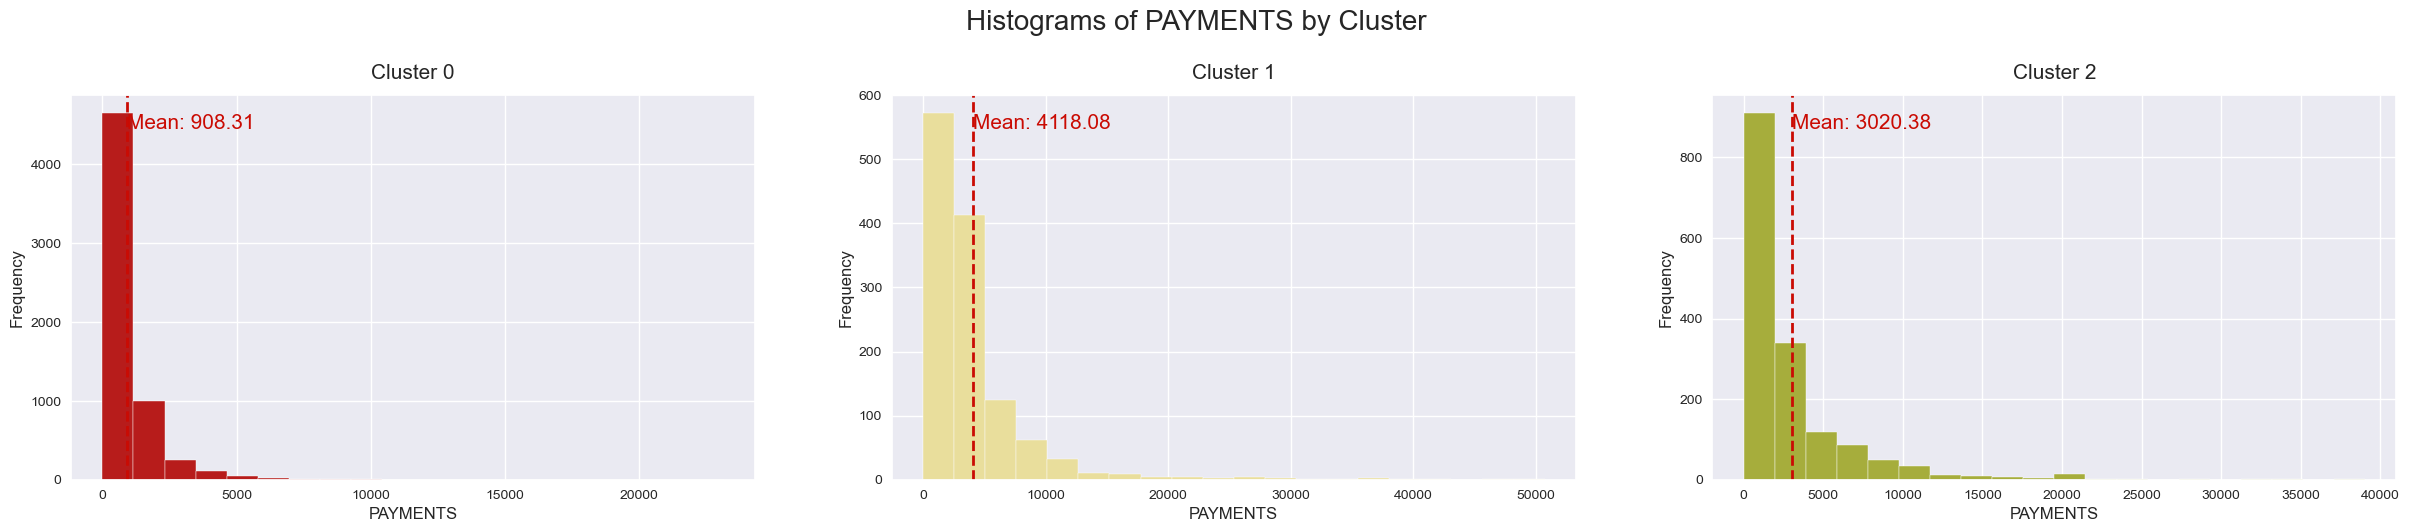

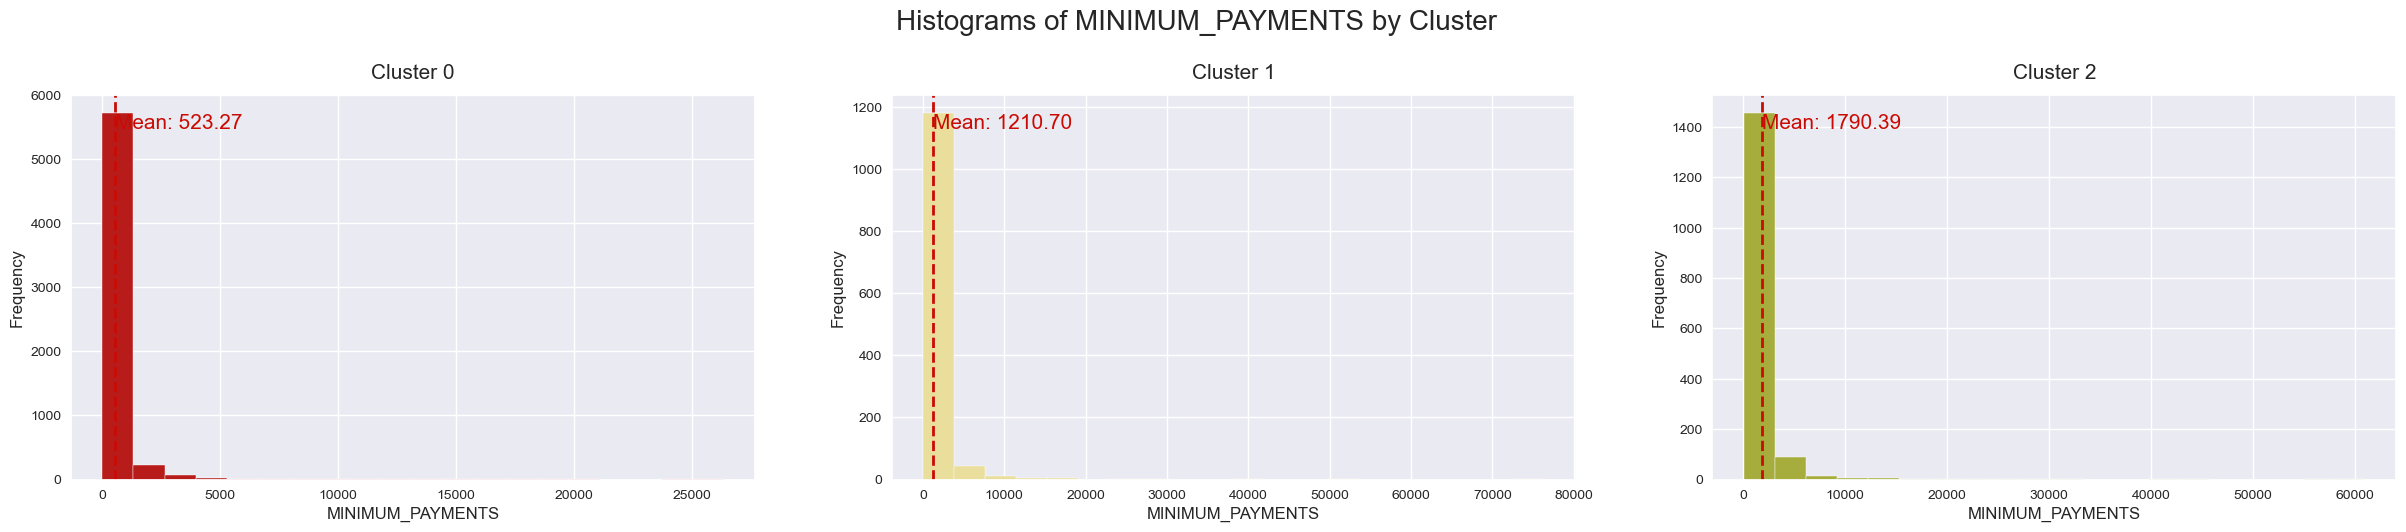

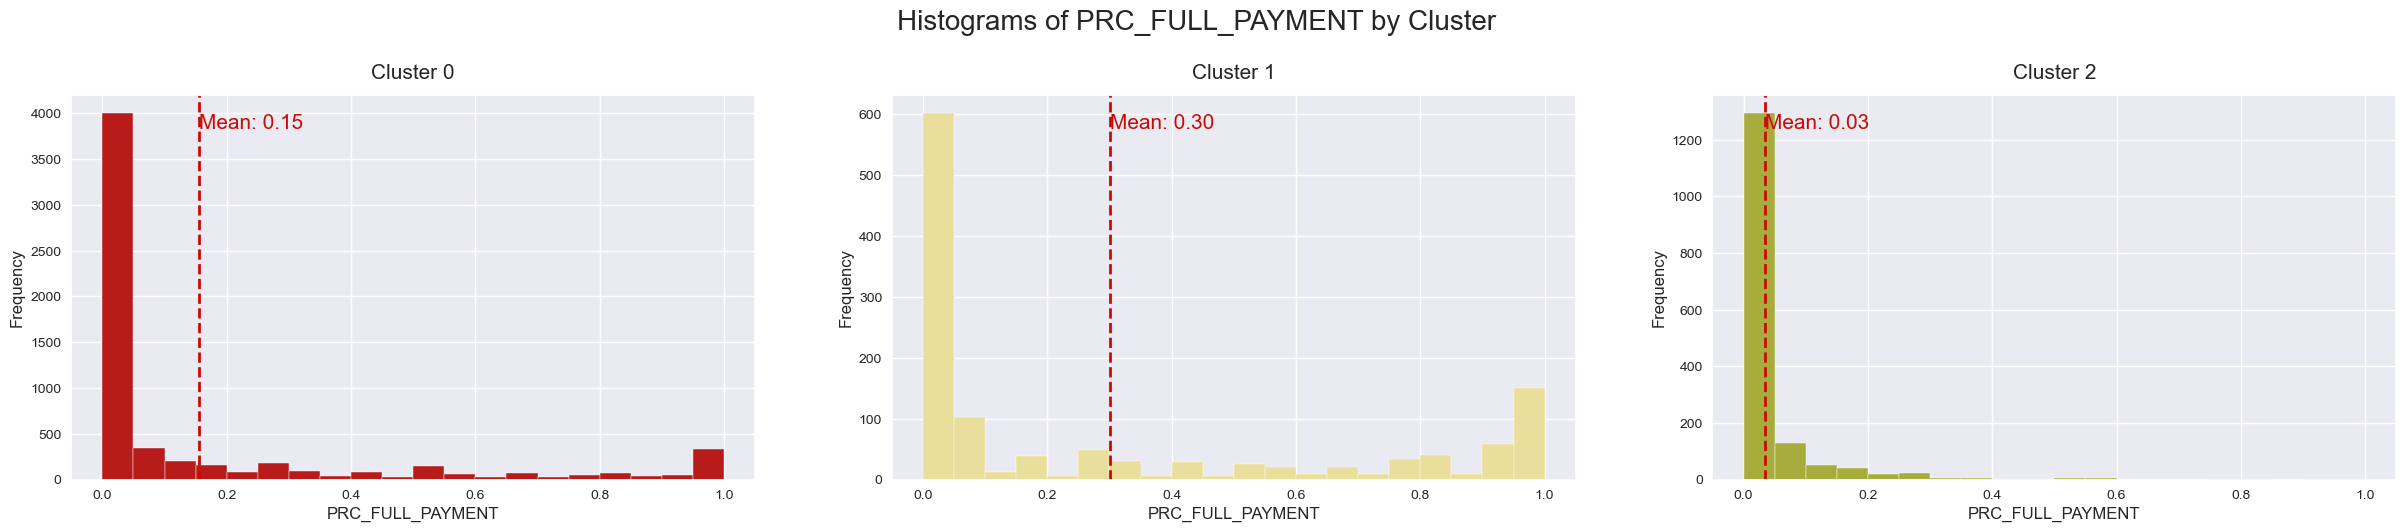

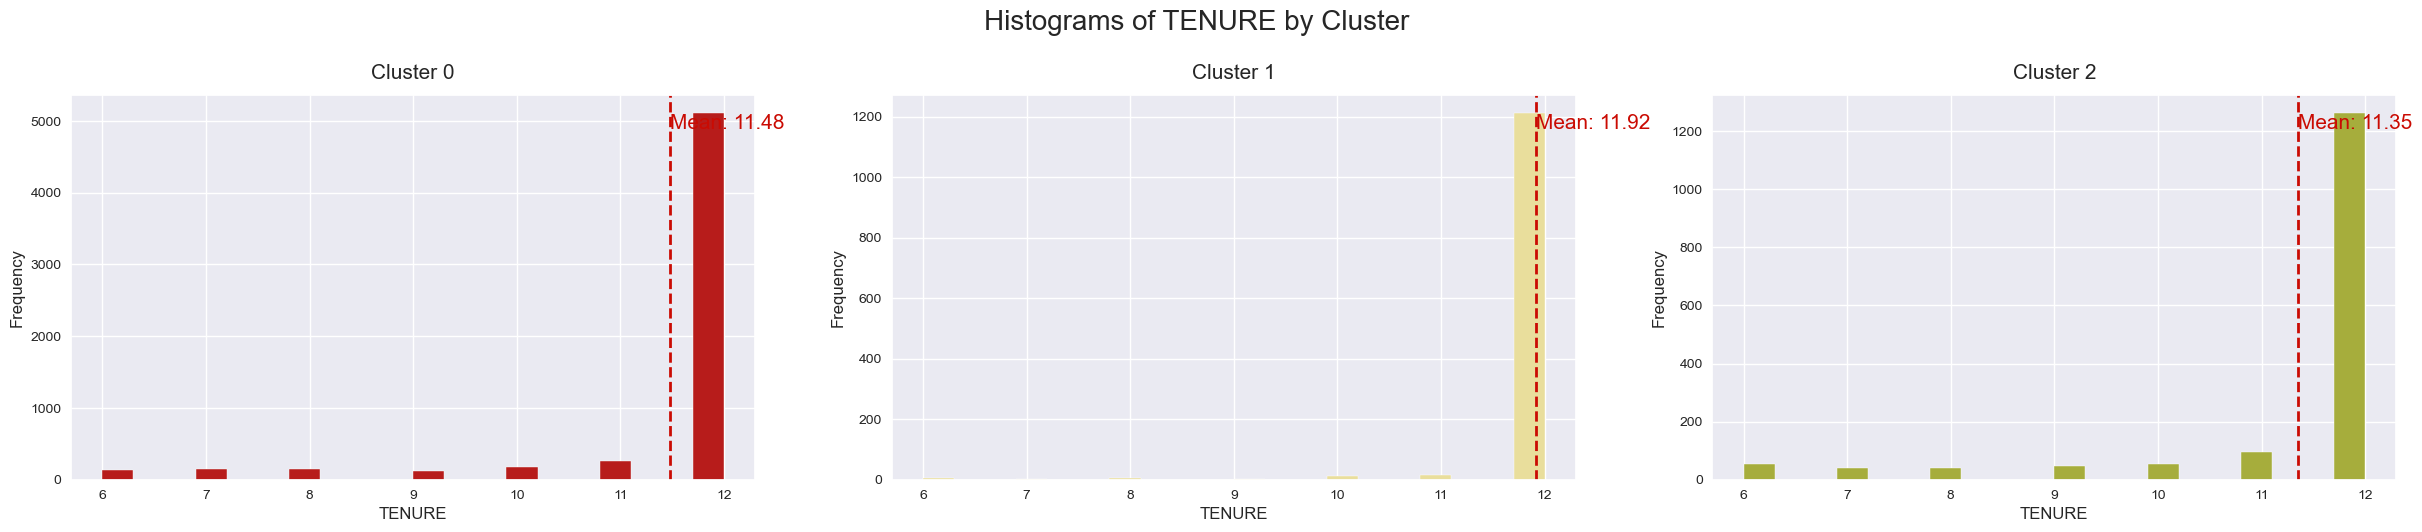

In [56]:
# Define custom color palette
colors = ["#B71C1B",'#e9de9c',"#A6AD3C"]

# Plot the histogram of various clusters
for col in df.columns:
    # Create a figure with subplots for each cluster
    fig, axes = plt.subplots(1, 3, figsize=(30,5))
    # Set the figure title
    fig.suptitle(f'Histograms of {col} by Cluster', fontsize=20, y=1.05)
    for j in range(3):
        # Select data for the current cluster and column
        cluster = kmeans_clustered_df[kmeans_clustered_df['K-means Cluster'] == j][col]
        # Plot the histogram for the current cluster and column
        counts, bins, patches = axes[j].hist(cluster, bins=20, color=colors[j])
        # Calculate and add the mean line to the histogram
        mean = cluster.mean()
        axes[j].axvline(mean, color='r', linestyle='dashed', linewidth=2)
        ymin, ymax = axes[j].get_ylim()
        axes[j].text(mean, ymax*0.95, f"Mean: {mean:.2f}", ha='left', va='top', color='r', fontsize=15)
        # Set the subplot title and axis labels
        axes[j].set_title(f'Cluster {j}', fontsize=15, y=1.02)
        axes[j].set_xlabel(col, fontsize=12)
        axes[j].set_ylabel('Frequency', fontsize=12)
    # Adjust the spacing between subplots and display the plot
    plt.subplots_adjust(wspace=0.2)
    plt.show()

<div style="border-radius:15px;border:#B71C1B solid;background-color:#F2ECC6; padding:20px; font-size:15px">

**🚨Note box:**
    
In this notebook, I have decided to implement **feature importance** analysis to identify the most significant features in our dataset. By identifying these crucial features, I can focus my visualization efforts on them and gain a deeper understanding of their impact on the overall dataset. This analysis will allow me to prioritize my visualization efforts, saving time while still gaining valuable insights from the data.

<a id="1"></a>  
#### <p style="padding:10px;background-color:#F2ECC6;margin:0;color:#A6AD3C;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">🔴Feature Importance</p>

#### 🌴X and y Arrays

In [57]:
# X and y Arrays
X = kmeans_clustered_df.drop('K-means Cluster', axis =1)
y = kmeans_clustered_df['K-means Cluster']

In [58]:
print ('X:', X.shape,'\ny:', y.shape)

X: (8949, 17) 
y: (8949,)


#### 🌴Train Test Split

In [59]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<IPython.core.display.Javascript object>

In [60]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7159, 17)
X_test shape: (1790, 17)
y_train shape: (7159,)
y_test shape: (1790,)


#### 🌴Train Various Models

In [61]:
# Create classifiers
clf1 = RandomForestClassifier()
clf2 = DecisionTreeClassifier()
clf3 = AdaBoostClassifier()
clf4 = GradientBoostingClassifier()
clf5 = xg.XGBClassifier()

# Fit classifiers and predict response for test dataset
models = [('Random Forest', clf1), ('Decision Tree', clf2), ('AdaBoost', clf3), ('Gradient Boosting', clf4), ('XGBoost', clf5)]
y_preds = []
for name, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_preds.append(y_pred)
    
# Compute accuracy scores and store in a DataFrame
Accuracy = ['Accuracy Score']
results = pd.DataFrame(index=Accuracy)
for i, (name, _) in enumerate(models):
    score = accuracy_score(y_test, y_preds[i])
    results[name] = [score]

# Find the best score
best_score = results.max(axis=1).iloc[0]
best_col = results.idxmax(axis=1).iloc[0]
highlight = results.style.apply(lambda x: ["background-color: #A6AD3C" if x.name == best_col and v == best_score else "" for v in x], axis=0)

highlight

<div style="border-radius:15px;border:#B71C1B solid;background-color:#F2ECC6; padding:20px; font-size:15px">

**🚨Note box:**
    
The value range of feature importance that indicates whether a specific feature is suitable for dimensionality reduction or not can vary depending on the specific machine learning algorithm and the dataset being used.

In general, feature importance values can range from 0 to 1, or from -1 to 1. A value of 0 indicates that the feature has no importance or does not contribute to the model's predictive power, while a value of 1 (or -1) indicates that the feature is highly important and has a strong correlation with the target variable.

For example, in a decision tree algorithm, feature importance is often calculated as the total reduction in the impurity of the node that is achieved by using that feature. In this case, a high feature importance value (close to 1) indicates that the feature is very informative for splitting the data and making accurate predictions.

In practice, the decision of whether to use a specific feature or apply dimensionality reduction is often based on a combination of factors, including the feature importance value, domain knowledge, and the specific goals of the analysis. In general, if a feature has a very low importance score and does not contribute much to the predictive power of the model, it may be a good candidate for removal or for the application of dimensionality reduction techniques. 

**✅Thus**, i decided to find the features with **importance above 0.05**.

#### 🌴Find the features with importance above 0.05

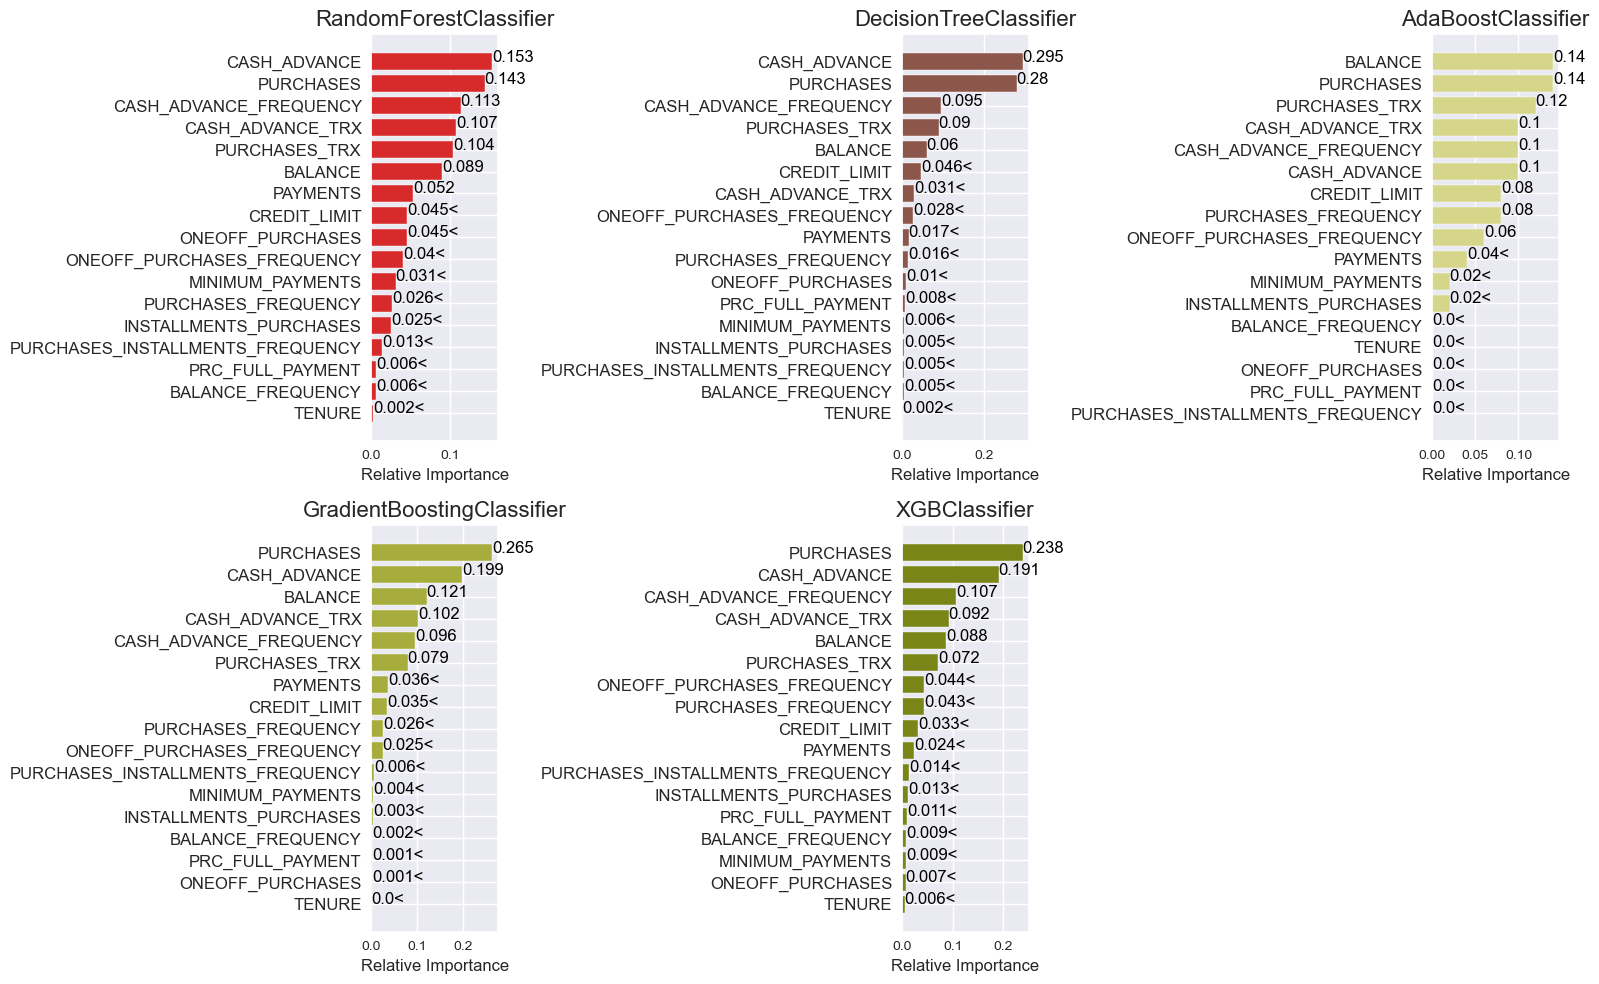

Common Features above 0.05:


Count
Feature                          
BALANCE                         5
PURCHASES_TRX                   5
CASH_ADVANCE_FREQUENCY          5
PURCHASES                       5
CASH_ADVANCE                    5
CASH_ADVANCE_TRX                4
PAYMENTS                        1
ONEOFF_PURCHASES_FREQUENCY      1
PURCHASES_FREQUENCY             1
CREDIT_LIMIT                    1

In [62]:
classifiers = [RandomForestClassifier(), DecisionTreeClassifier(), AdaBoostClassifier(),
               GradientBoostingClassifier(), xg.XGBClassifier()]

# Train each classifier on the Iris dataset
for clf in classifiers:
    clf.fit(X_train, y_train)

# Get the feature importances for each classifier
importances = [clf.feature_importances_ for clf in classifiers]

# Get the indices of the sorted feature importances for each classifier
sorted_idx = [np.argsort(importance) for importance in importances]

# Get the features above the value of 0.05 that are common to all classifiers
common_features = []
for i in range(len(classifiers)):
    idx = sorted_idx[i][importances[i][sorted_idx[i]] >= 0.05]
    common_features.extend(X_train.columns[idx])
    
common_features_count = Counter(common_features)
common_features_table = pd.DataFrame.from_dict(common_features_count, orient='index', columns=['Count'])
common_features_table.index.name = 'Feature'
common_features_table.sort_values(by=['Count'], ascending=False, inplace=True)

# Create a horizontal bar plot of the feature importances for each classifier
colors = ["#D72A2B",'#8C564B',"#D5D68A","#A6AD3C","#798517"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i, ax in enumerate(axes.flatten()):
    if i < len(classifiers):
        importance_vals = importances[i][sorted_idx[i]]
        sign = np.where(importance_vals < 0.05, "<", "")
        ax.barh(range(X_train.shape[1]), importance_vals, color=colors[i])
        ax.set_title(type(classifiers[i]).__name__, fontsize=16)
        ax.set_yticks(range(X_train.shape[1]))
        ax.set_yticklabels(np.array(X_train.columns)[sorted_idx[i]], fontsize=12)
        ax.set_xlabel('Relative Importance', fontsize=12)
        # Add feature values to the bars
        for j, v in enumerate(importance_vals):
            ax.text(v, j, str(round(v, 3))+sign[j], color='black', fontsize=12)
    else:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

# Show the common features table
print("Common Features above 0.05:")
display(common_features_table)

<div style="border-radius:15px;border:#A6AD3C solid;background-color:#F2ECC6; padding:20px; font-size:15px">

**🪐Explanations:**
    
The **6 features** with the **highest importance**, which are common among all classifiers, are as follows:
    
    1. BALANCE
    2. PURCHASES
    3. CASH_ADVANC
    4. PURCHASES_TRX
    5. CASH_ADVANCE_FREQUENCY
    6. CASH_ADVANCE_TRX
    
In the following, I will focus on these features.

#### 🌴Cluster Analysis and customers segmentation (Scaled data)

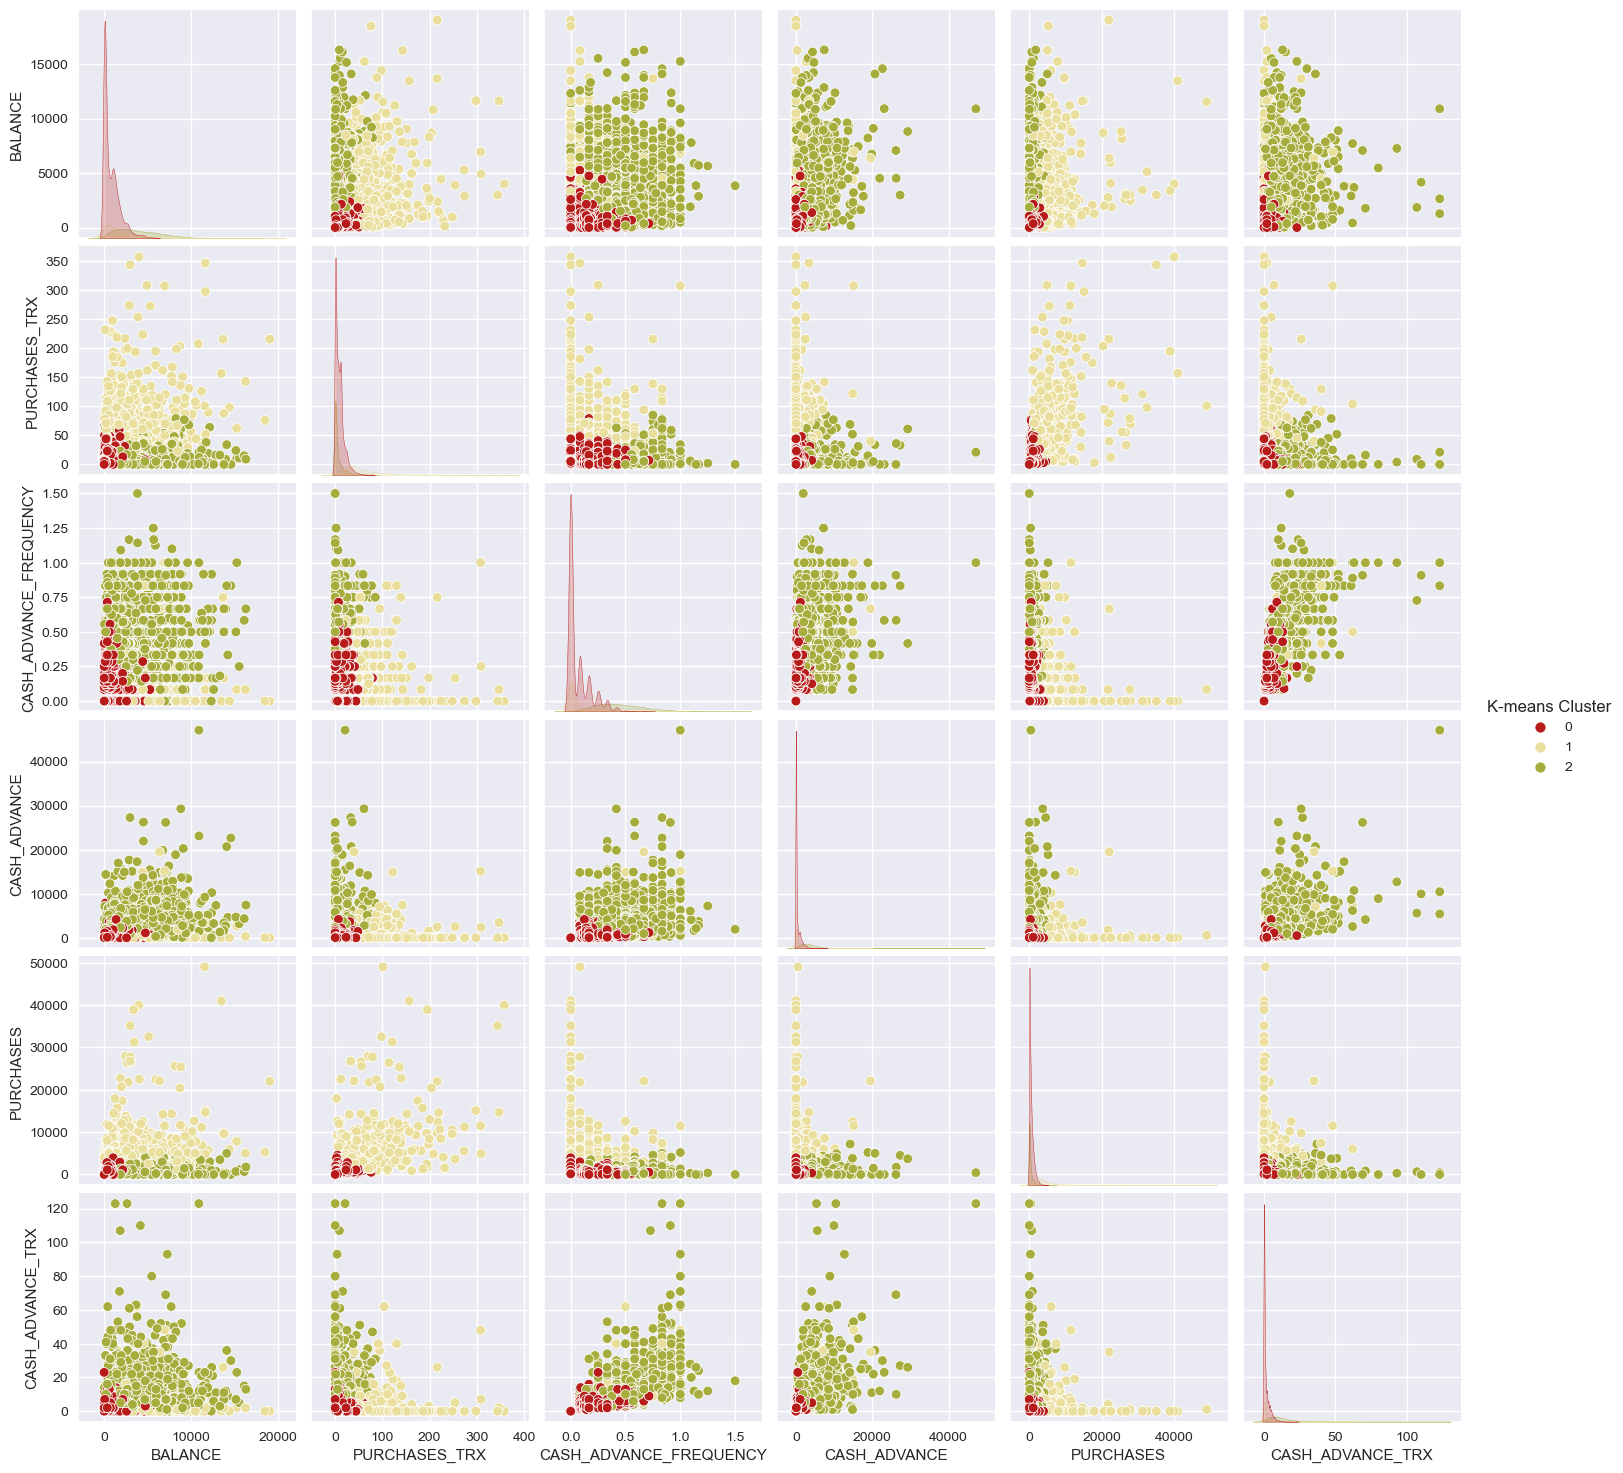

In [63]:
# Pairplot (Scaled data)
important_variables = ['BALANCE', 'PURCHASES_TRX', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE', 'PURCHASES', 'CASH_ADVANCE_TRX', 'K-means Cluster']

colors = ["#B71C1B",'#e9de9c',"#A6AD3C"]

sns.set_style('darkgrid')
sns.pairplot(kmeans_clustered_df[important_variables], hue='K-means Cluster', palette=colors)
plt.show()

In [64]:
# Summarizing the average values of each feature within each cluster
avg_df = kmeans_clustered_df.groupby(['K-means Cluster'], as_index=False).mean()
avg_df.style.background_gradient(cmap=cmap).set_properties(**{'font-family': 'Segoe UI'}).hide_index()

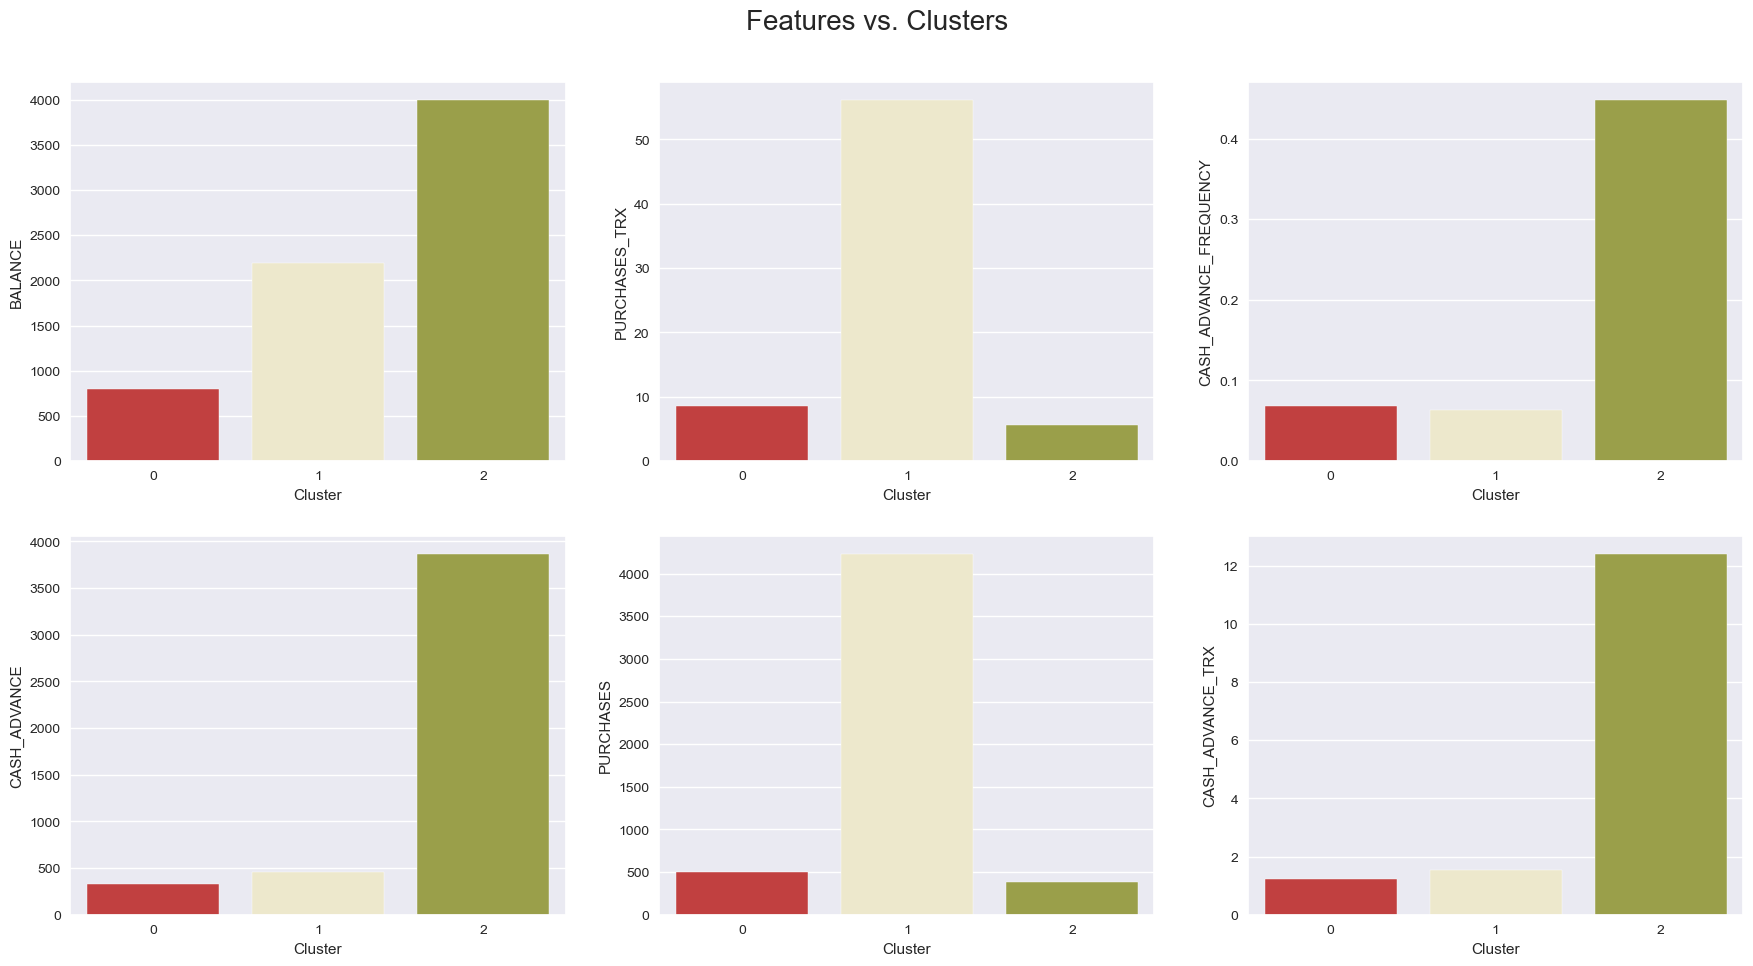

In [65]:
custom_colors = ["#D72A2B", "#F2ECC6", "#A6AD3C"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i, col in enumerate(['BALANCE', 'PURCHASES_TRX', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE', 'PURCHASES', 'CASH_ADVANCE_TRX']):
    sns.barplot(x='K-means Cluster', y=col, data=avg_df, ax=axes[i//3][i%3], palette=custom_colors)
    axes[i//3][i%3].set_xlabel('Cluster')
    axes[i//3][i%3].set_ylabel(col)
plt.suptitle('Features vs. Clusters', fontsize=20)
fig.tight_layout(pad=2.0)
plt.show()

In [66]:
db_g = pd.DataFrame(kmeans_clustered_df.groupby(['K-means Cluster','TENURE'])['TENURE'].count())
db_g.T.style.background_gradient(cmap=cmap).set_properties(**{'font-family': 'Segoe UI'})

#### 🌴Distribution of the most important features after Clustering

In [67]:
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))

features = ['BALANCE', 'PURCHASES_TRX', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE', 'PURCHASES', 'CASH_ADVANCE_TRX']

for feature in features:
    fig = px.histogram(kmeans_clustered_df, x=feature, color='K-means Cluster', template=temp,
                       marginal='box', opacity=0.7, nbins=50, color_discrete_sequence=[custom_colors[2], custom_colors[0]],
                       barmode='group', histfunc='count')
    
    fig.update_layout(
        font_family='monospace',
        title=dict(text=f'Distribution of {feature} After Clustering', x=0.5, y=0.95,
                   font=dict(color=custom_colors[2], size=20)),
        xaxis_title_text=feature,
        yaxis_title_text='Count',
        legend=dict(x=1, y=0.96, bordercolor=custom_colors[1], borderwidth=0, tracegroupgap=5),
        bargap=0.3,
    )
    fig.show()

<IPython.core.display.Javascript object>

#### 🌴Cluster Analysis and customers segmentation (Orginal data)

In [68]:
# Fit KMeans algorithm to clustered data
kmeans = KMeans(n_clusters=best_k, **kmeans_params)
cluster_labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

In [69]:
# Add cluster labels to a copy of the data
df_kmean = df.copy()
df_kmean['K-means Cluster'] = cluster_labels
df_kmean.head(10).style.set_properties(**{'background-color': '#F2ECC6'}, subset=['K-means Cluster'])

In [70]:
df_kmean.shape

(8949, 18)

#### 🌴Distribution of Data Points by Cluster (Orginal data)

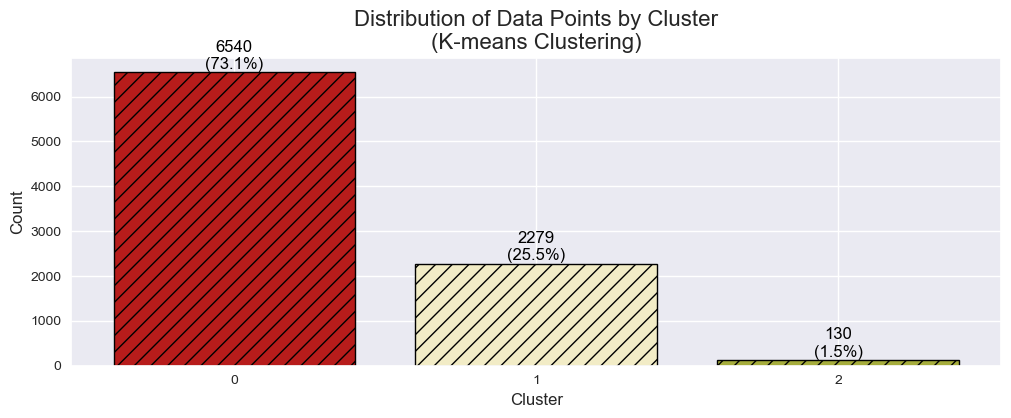

In [71]:
# Distribution of Data Points by Cluster
counts = df_kmean['K-means Cluster'].value_counts()
labels = counts.index.tolist()
sizes = counts.tolist()

# Calculate percentages and counts
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]
counts = [f'{size}\n({percentages[i]:.1f}%)' for i, size in enumerate(sizes)]

# Create the bar plot
plt.figure(figsize=(12, 4))
colors = ["#B71C1B","#F2ECC6","#A6AD3C"]
bars = plt.bar(labels, sizes, color=colors, edgecolor='black', linewidth=1, hatch='//')
plt.xticks(range(len(labels)), [str(i) for i in range(len(labels))])

# Add counts to bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             counts[i], ha='center', va='bottom', color='black', fontsize=12)

# Set the axis labels and title
plt.xlabel('Cluster', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title('Distribution of Data Points by Cluster\n(K-means Clustering)', fontsize= 16)
plt.show()

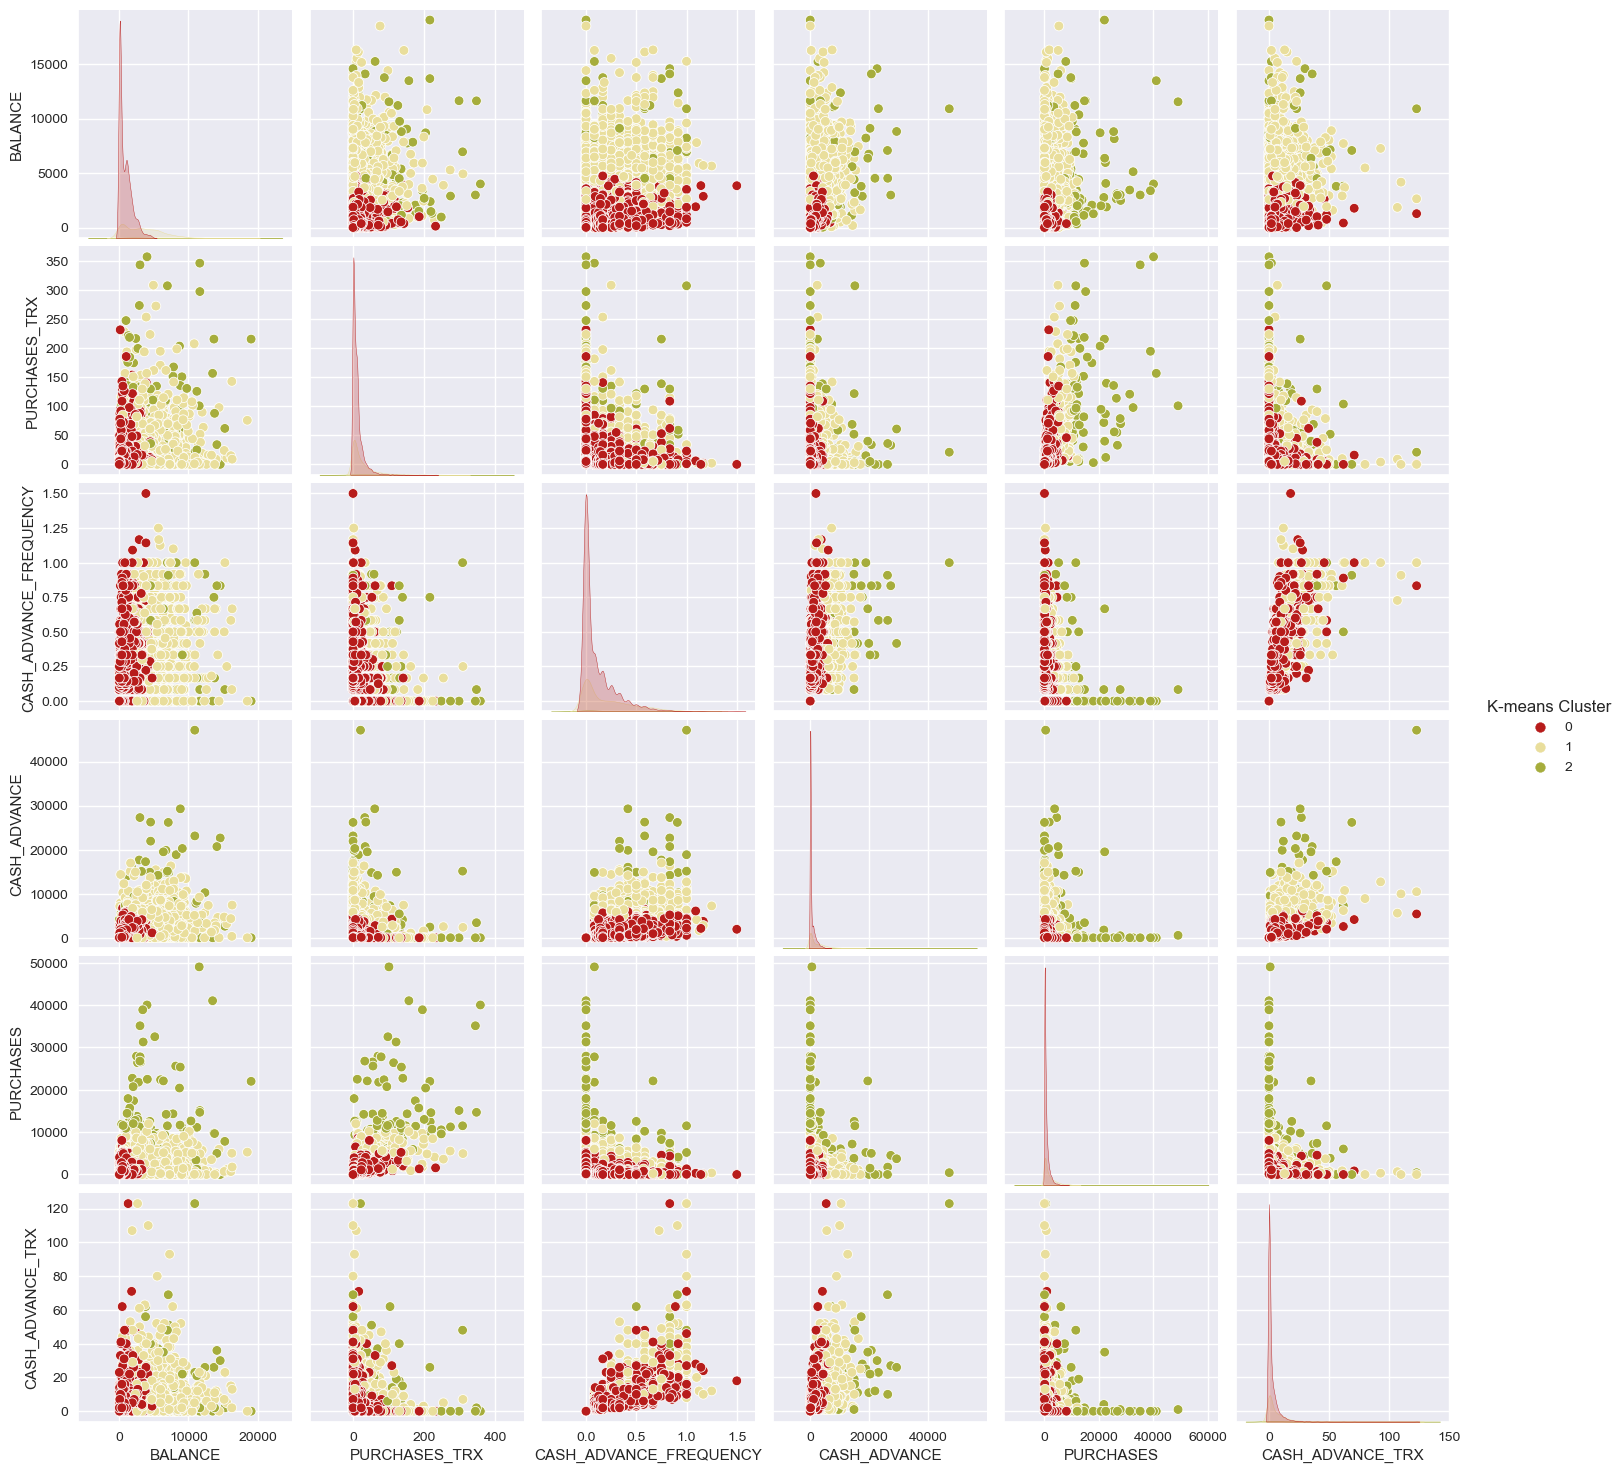

In [72]:
# Pairplot (Orginal data)
colors = ["#B71C1B",'#e9de9c',"#A6AD3C"]

sns.set_style('darkgrid')
sns.pairplot(df_kmean[important_variables], hue='K-means Cluster', palette=colors)
plt.show()

In [73]:
# Plot of clusters
fig = px.scatter(df_kmean, x="PURCHASES", y="CASH_ADVANCE_TRX", color="K-means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>PURCHASES vs. CASH_ADVANCE_TRX", 
                  width=700, legend_title='K-means Cluster',
                  xaxis=dict(title='PURCHASES', showline=True, zeroline=False), 
                  yaxis=dict(title='CASH_ADVANCE_TRX', ticksuffix='k', showline=True))
fig.show()